In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("updated_crime_data.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,8469560,HV146176,02/04/2012 09:00:00 PM,038XX W 80TH ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,STREET,False,False,...,18.0,70.0,14,1152266.0,1851268.0,2012,02/10/2018 03:50:01 PM,41.747738,-87.717629,"(41.747738327, -87.717629054)"
1,4492823,HL795312,12/17/2005 06:25:00 PM,088XX S DORCHESTER AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,8.0,48.0,14,1186996.0,1846683.0,2005,02/28/2018 03:56:25 PM,41.734404,-87.590513,"(41.734404191, -87.590513422)"
2,7031881,HR439386,06/27/2009 02:00:00 AM,050XX N KENMORE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,TAXICAB,False,False,...,46.0,3.0,11,1168334.0,1933984.0,2009,02/28/2018 03:56:25 PM,41.974387,-87.656361,"(41.974387363, -87.656360778)"
3,4835143,HM446705,06/26/2006 08:00:00 PM,004XX E 91ST ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,6.0,44.0,14,1180843.0,1844741.0,2006,02/28/2018 03:56:25 PM,41.729219,-87.613115,"(41.729218626, -87.613114546)"
4,12808856,JF374310,08/29/2022 04:20:00 AM,052XX N MASON AVE,0810,THEFT,OVER $500,STREET,False,False,...,45.0,11.0,06,1135537.0,1934461.0,2022,01/03/2023 03:46:28 PM,41.976344,-87.776955,"(41.976344142, -87.776954912)"


In [4]:
df.shape

(3542218, 22)

In [5]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
# Remove Infinities
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
df.shape

(3542218, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542218 entries, 0 to 3542217
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [10]:
df = df.drop("ID", axis=1)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Beat,3542218.0,1.181915e+03,702.375867,111.000000,6.210000e+02,1.034000e+03,1.724000e+03,2.535000e+03
District,3542218.0,1.128342e+01,6.947478,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,3542218.0,2.273284e+01,13.851405,1.000000,1.000000e+01,2.200000e+01,3.400000e+01,5.000000e+01
Community Area,3542218.0,3.749497e+01,21.529253,0.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
X Coordinate,3542218.0,1.164609e+06,16906.062964,0.000000,1.152956e+06,1.166124e+06,1.176389e+06,1.205119e+06
Y Coordinate,3542218.0,1.885657e+06,32360.874966,0.000000,1.858900e+06,1.890652e+06,1.909135e+06,1.951535e+06
Year,3542218.0,2.010671e+03,5.941676,2001.000000,2.006000e+03,2.010000e+03,2.015000e+03,2.023000e+03
Latitude,3542218.0,4.184184e+01,0.089034,36.619446,4.176825e+01,4.185575e+01,4.190651e+01,4.202267e+01
Longitude,3542218.0,-8.767147e+01,0.061283,-91.686566,-8.771376e+01,-8.766581e+01,-8.762811e+01,-8.752453e+01


Exploratory Data Analysis

In [12]:
df['Primary Type'].value_counts()

Primary Type
THEFT                                748881
BATTERY                              650358
CRIMINAL DAMAGE                      406069
NARCOTICS                            334647
ASSAULT                              232651
OTHER OFFENSE                        220167
BURGLARY                             194999
MOTOR VEHICLE THEFT                  170006
DECEPTIVE PRACTICE                   151591
ROBBERY                              134164
CRIMINAL TRESPASS                     97853
WEAPONS VIOLATION                     50325
PROSTITUTION                          30659
OFFENSE INVOLVING CHILDREN            24907
PUBLIC PEACE VIOLATION                24265
SEX OFFENSE                           13243
CRIM SEXUAL ASSAULT                   12010
INTERFERENCE WITH PUBLIC OFFICER       8892
GAMBLING                               6801
LIQUOR LAW VIOLATION                   6219
HOMICIDE                               6004
ARSON                                  5964
KIDNAPPING         

Distribution Analysis

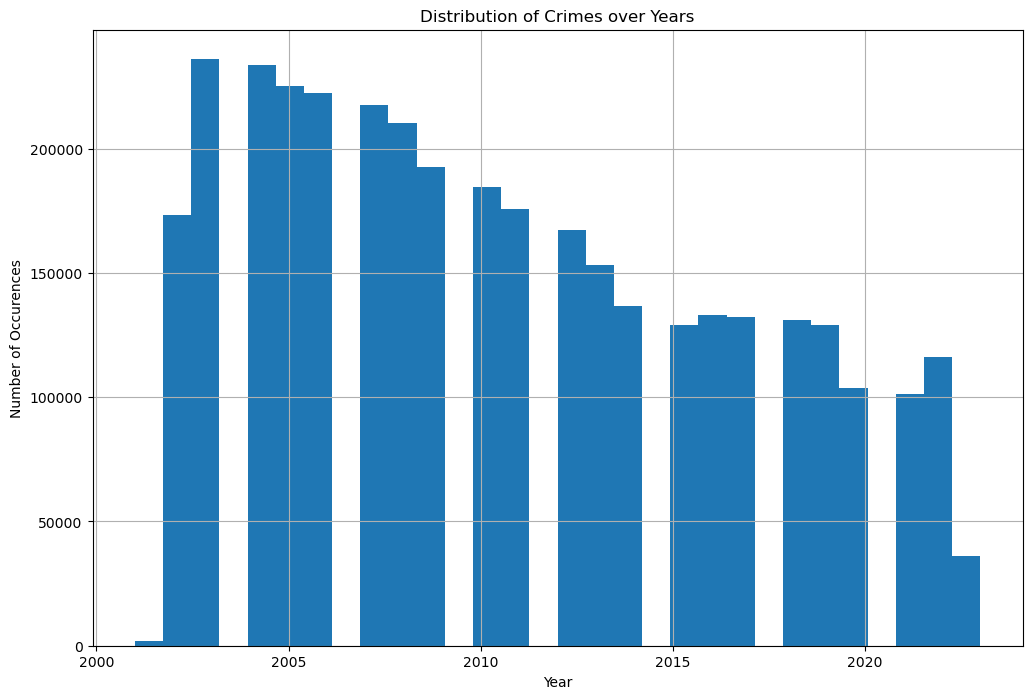

In [13]:
plt.figure(figsize=(12, 8))
df['Year'].hist(bins=30)
plt.xlabel("Year")
plt.ylabel("Number of Occurences")
plt.title("Distribution of Crimes over Years")
plt.show()

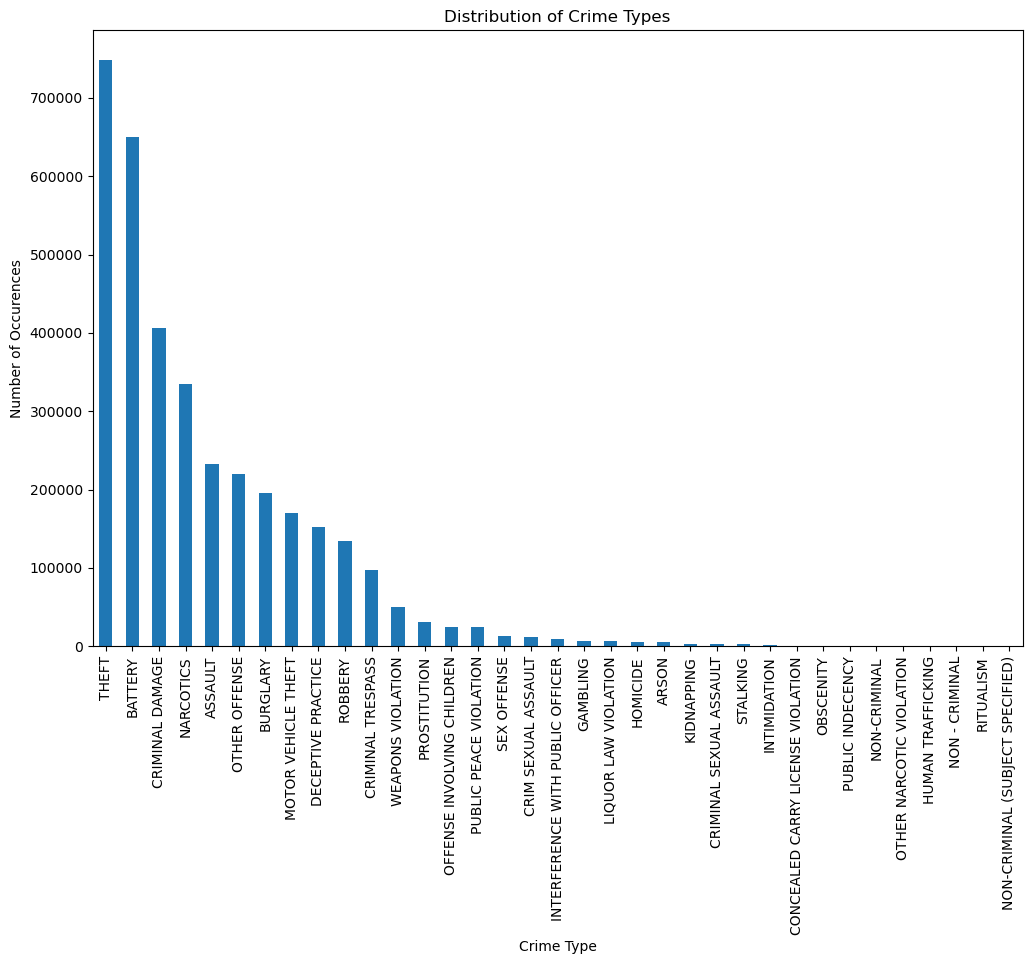

In [14]:
plt.figure(figsize=(12, 8))
df['Primary Type'].value_counts().plot(kind='bar')
plt.xlabel("Crime Type")
plt.ylabel("Number of Occurences")
plt.title("Distribution of Crime Types")
plt.show()

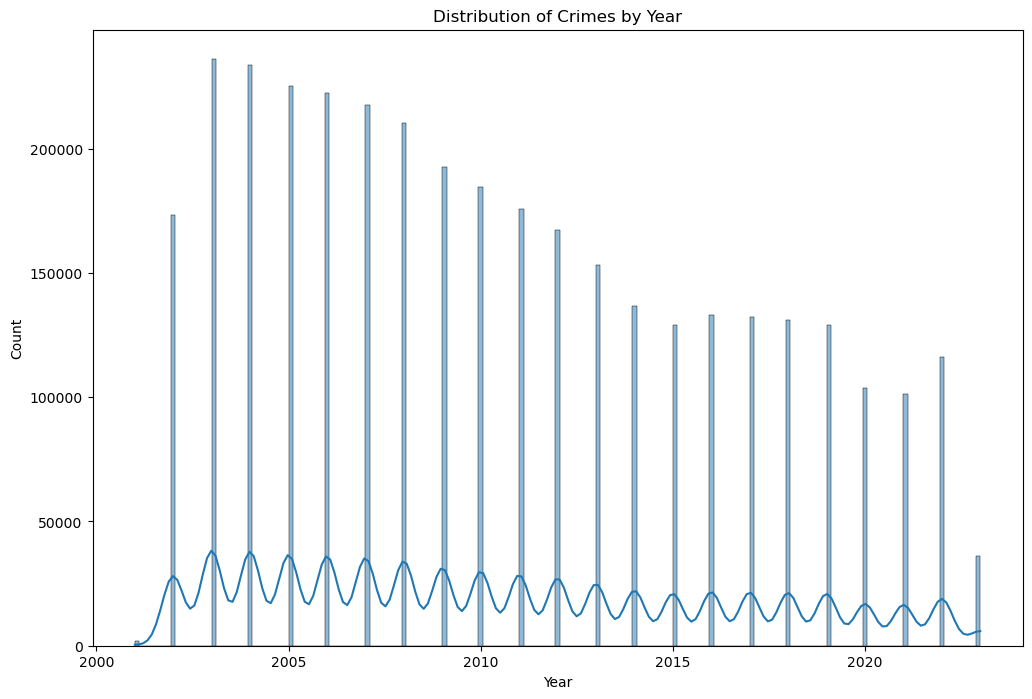

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of Crimes by Year')
plt.show()

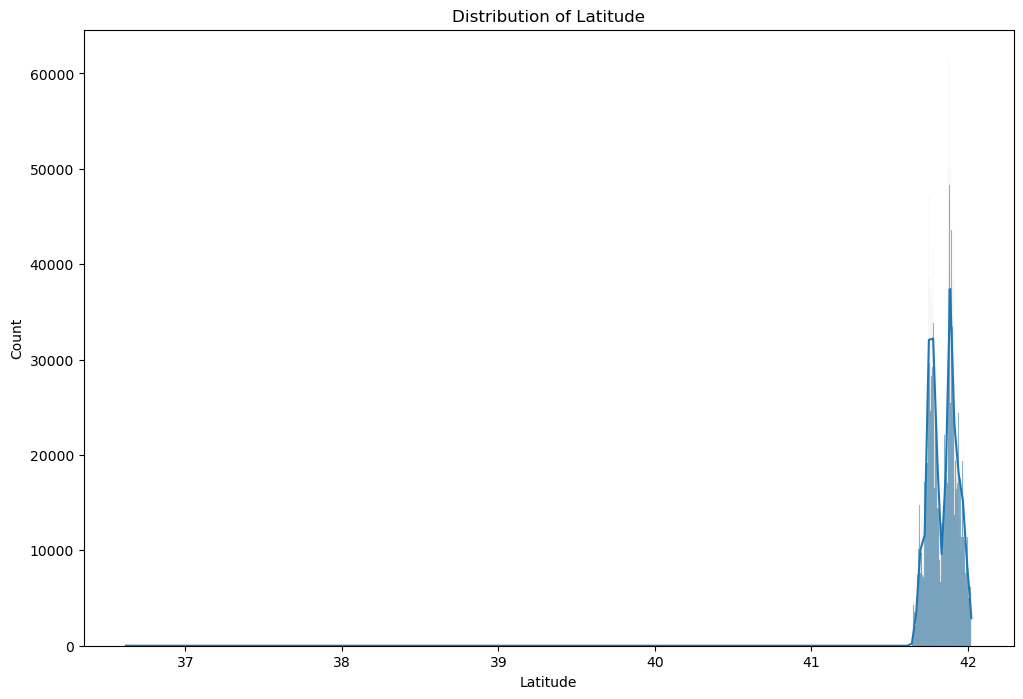

In [16]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Latitude'].dropna(), kde=True)
plt.title('Distribution of Latitude')
plt.show()

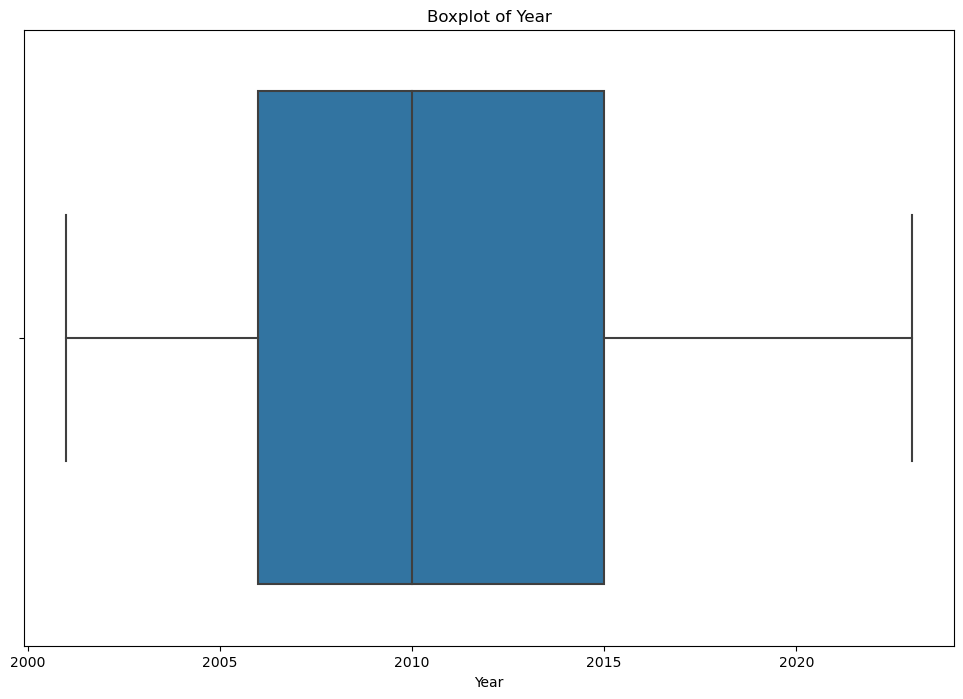

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Year'])
plt.title('Boxplot of Year')
plt.show()

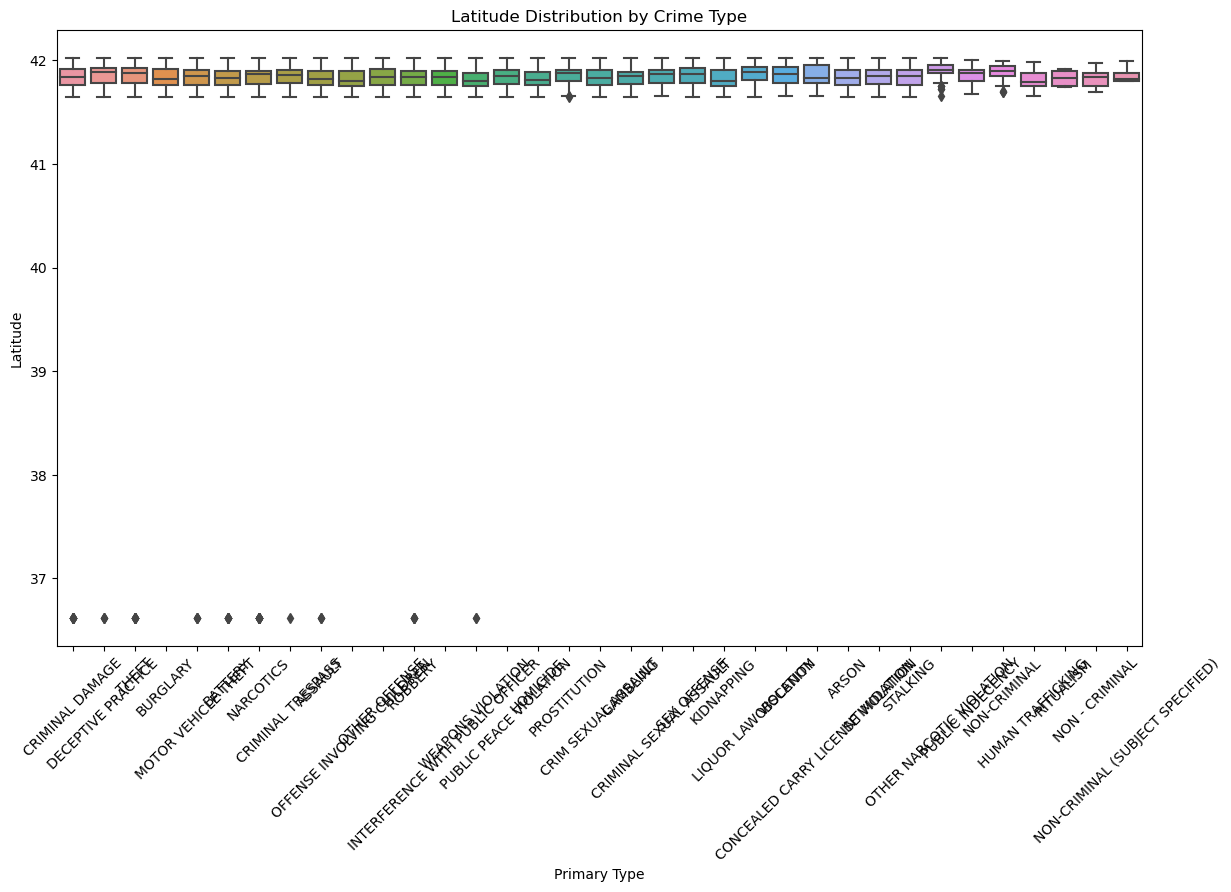

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df['Primary Type'], y=df['Latitude'])
plt.title('Latitude Distribution by Crime Type')
plt.xticks(rotation=45)
plt.show()

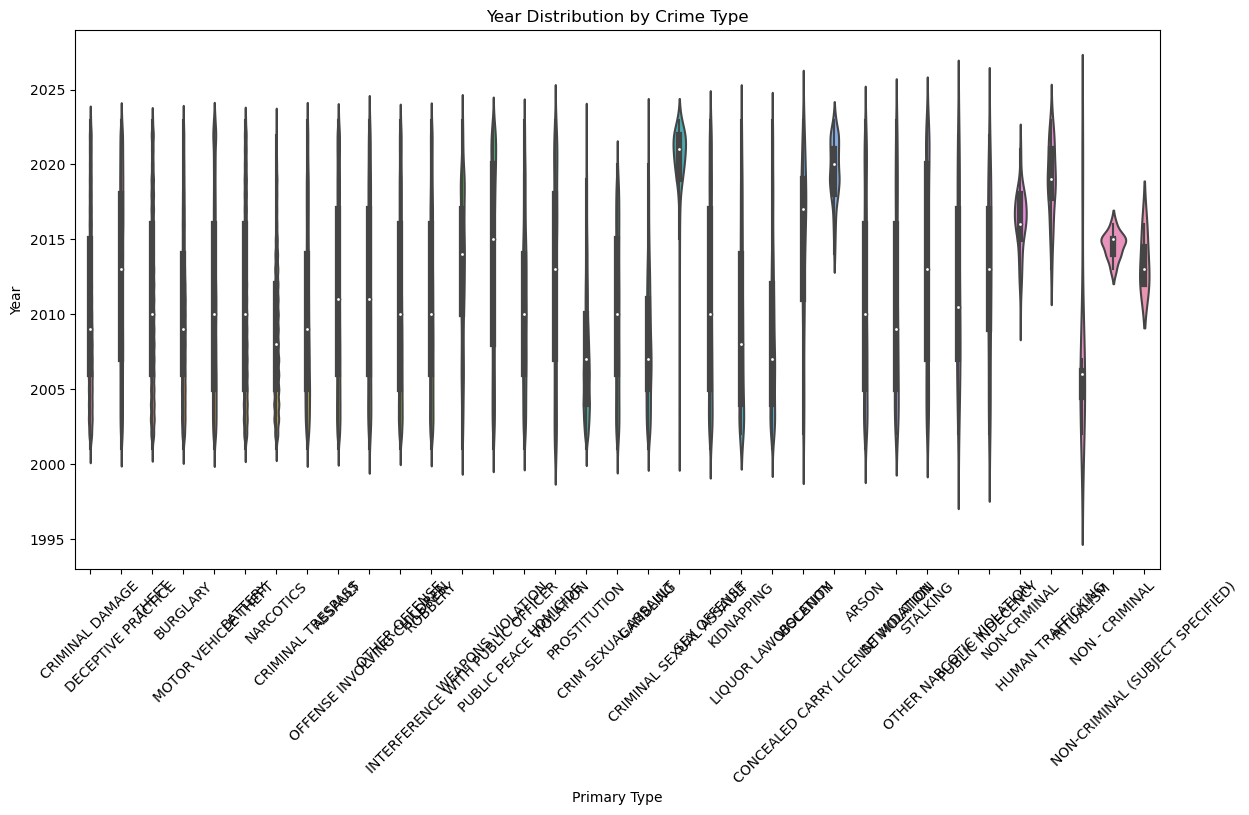

In [19]:
plt.figure(figsize=(14,7))
sns.violinplot(x=df['Primary Type'], y=df['Year'])
plt.title('Year Distribution by Crime Type')
plt.xticks(rotation=45)
plt.show()

Primary Type
THEFT                                748881
BATTERY                              650358
CRIMINAL DAMAGE                      406069
NARCOTICS                            334647
ASSAULT                              232651
OTHER OFFENSE                        220167
BURGLARY                             194999
MOTOR VEHICLE THEFT                  170006
DECEPTIVE PRACTICE                   151591
ROBBERY                              134164
CRIMINAL TRESPASS                     97853
WEAPONS VIOLATION                     50325
PROSTITUTION                          30659
OFFENSE INVOLVING CHILDREN            24907
PUBLIC PEACE VIOLATION                24265
SEX OFFENSE                           13243
CRIM SEXUAL ASSAULT                   12010
INTERFERENCE WITH PUBLIC OFFICER       8892
GAMBLING                               6801
LIQUOR LAW VIOLATION                   6219
HOMICIDE                               6004
ARSON                                  5964
KIDNAPPING         

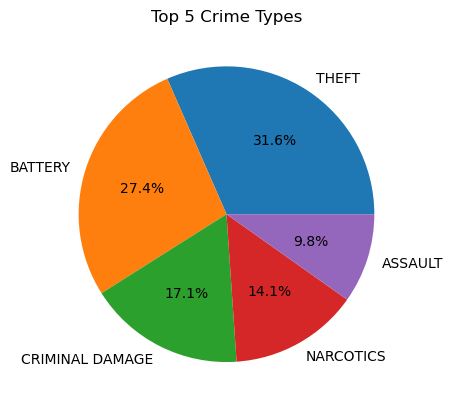

In [20]:
crime_counts = df['Primary Type'].value_counts()
print(crime_counts)

# Pie chart for top 5 crime types
top_crimes = crime_counts.head(5)
top_crimes.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Crime Types')
plt.ylabel('')  # This is to remove the default 'Primary Type' ylabel that gets added
plt.show()

Identify repeat offenders for specific types of crimes

In [21]:
repeat_offenders = df.groupby(['Primary Type', 'Description', 'Arrest', 'Domestic', 'Year']).size().reset_index(name='counts')
repeat_offenders = repeat_offenders[repeat_offenders['counts'] > 1]
repeat_offenders.sort_values(by='counts', ascending=False, inplace=True)
repeat_offenders.head(10)

,Primary Type,Description,Arrest,Domestic,Year,counts
15378,THEFT,$500 AND UNDER,False,False,2003,17112
15379,THEFT,$500 AND UNDER,False,False,2004,16559
15377,THEFT,$500 AND UNDER,False,False,2002,13786
15386,THEFT,$500 AND UNDER,False,False,2011,13148
15389,THEFT,$500 AND UNDER,False,False,2014,13144
3141,BATTERY,SIMPLE,False,False,2003,13113
15387,THEFT,$500 AND UNDER,False,False,2012,13063
3142,BATTERY,SIMPLE,False,False,2004,12976
15380,THEFT,$500 AND UNDER,False,False,2005,12872
3143,BATTERY,SIMPLE,False,False,2005,12704


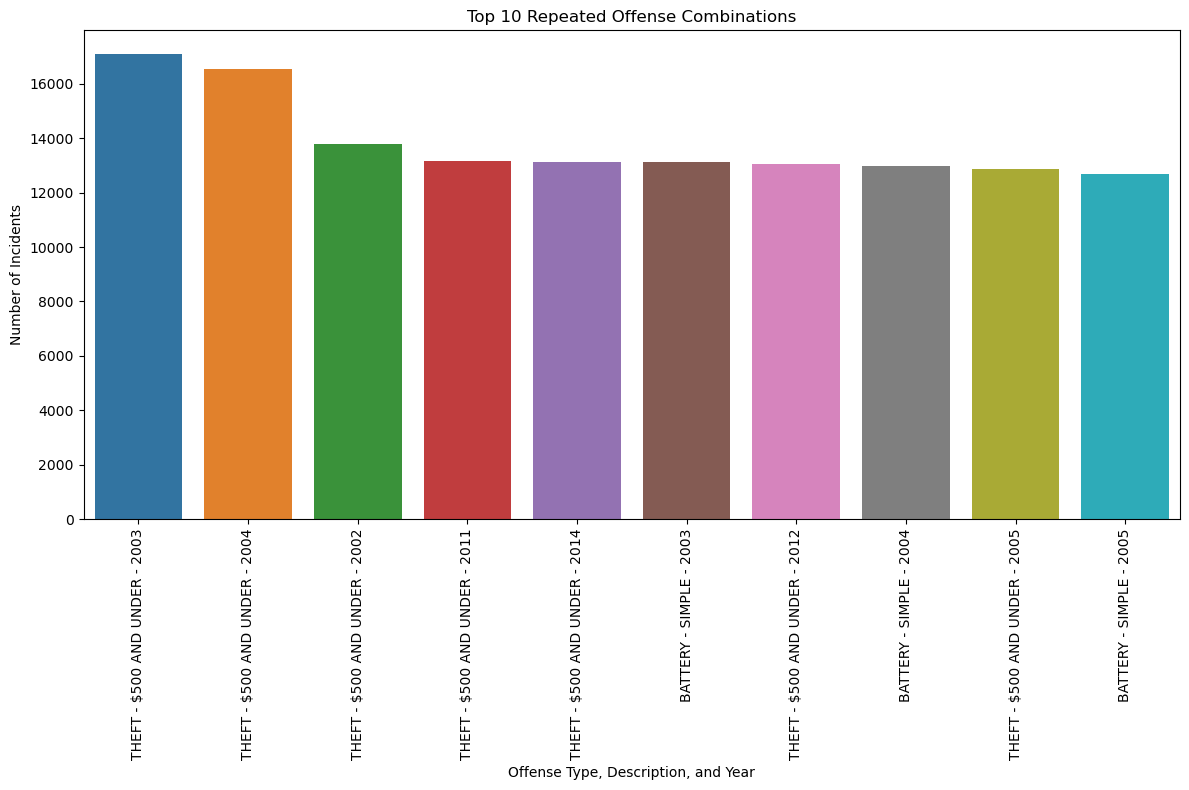

In [22]:
# Create a label column for x-axis
repeat_offenders['Label'] = repeat_offenders['Primary Type'] + " - " + repeat_offenders['Description'] + " - " + repeat_offenders['Year'].astype(str)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Label', y='counts', data=repeat_offenders.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Repeated Offense Combinations')
plt.ylabel('Number of Incidents')
plt.xlabel('Offense Type, Description, and Year')
plt.tight_layout()
plt.show()

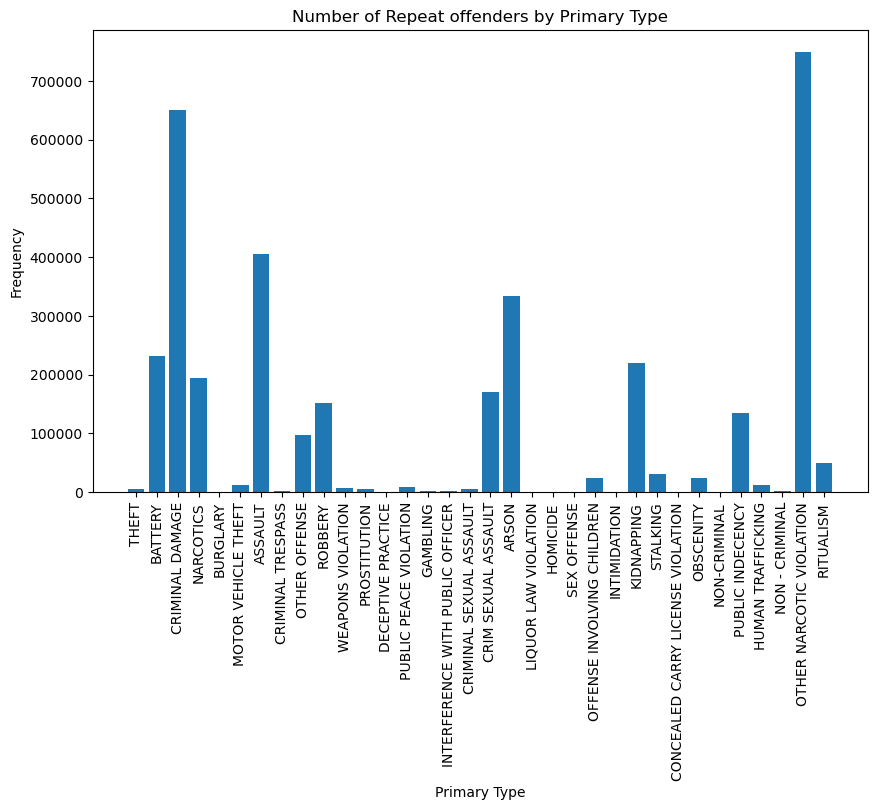

In [23]:
# Bar chart of the number of repeat offenders by primary type
plt.figure(figsize=(10, 6))
plt.bar(repeat_offenders['Primary Type'].unique(), repeat_offenders['counts'].groupby(repeat_offenders['Primary Type']).sum())
plt.title("Number of Repeat offenders by Primary Type")
plt.xlabel('Primary Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

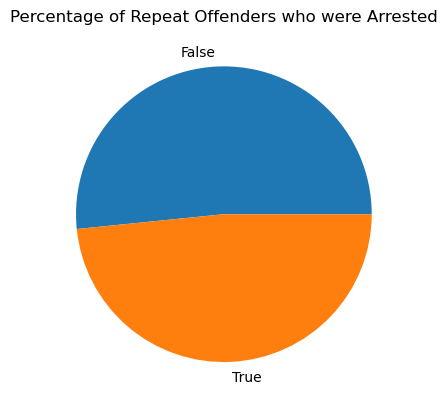

In [24]:
# Create a pie chart of the percentage of repeat offenders who were arrested
plt.pie(repeat_offenders['Arrest'].value_counts(), labels=repeat_offenders['Arrest'].unique())
plt.title('Percentage of Repeat Offenders who were Arrested')
plt.show()

In [25]:
# Analyze behavior patterns of repeat offenders
repeat_offenders['Primary Type'].value_counts()

Primary Type
BATTERY                              1536
OTHER OFFENSE                        1428
DECEPTIVE PRACTICE                   1130
NARCOTICS                            1048
OFFENSE INVOLVING CHILDREN            911
ASSAULT                               902
ROBBERY                               804
THEFT                                 689
WEAPONS VIOLATION                     483
SEX OFFENSE                           476
PUBLIC PEACE VIOLATION                466
CRIM SEXUAL ASSAULT                   449
CRIMINAL DAMAGE                       431
MOTOR VEHICLE THEFT                   423
CRIMINAL TRESPASS                     346
BURGLARY                              306
INTERFERENCE WITH PUBLIC OFFICER      250
KIDNAPPING                            246
ARSON                                 241
PROSTITUTION                          178
STALKING                              151
CRIMINAL SEXUAL ASSAULT               151
INTIMIDATION                          110
GAMBLING             

In [26]:
repeat_offenders['Description'].value_counts()

Description
SIMPLE                                 258
AGGRAVATED: HANDGUN                    188
AGGRAVATED: OTHER DANG WEAPON          175
TO VEHICLE                             170
AGGRAVATED                             170
                                      ... 
ARSONIST: DUTY TO REGISTER               1
STRONGARM: NO WEAPON                     1
PATRONIZE JUVENILE PROSTITUTE            1
INTERFERE W/ EMERGENCY EQUIP             1
DELIVER CANNABIS TO PERSON UNDER 18      1
Name: count, Length: 475, dtype: int64

In [27]:
repeat_offenders['Arrest'].value_counts()

Arrest
False    7024
True     6589
Name: count, dtype: int64

In [28]:
# Identify the most common types of crimes
repeat_offenders['Primary Type'].value_counts().head(10)

Primary Type
BATTERY                       1536
OTHER OFFENSE                 1428
DECEPTIVE PRACTICE            1130
NARCOTICS                     1048
OFFENSE INVOLVING CHILDREN     911
ASSAULT                        902
ROBBERY                        804
THEFT                          689
WEAPONS VIOLATION              483
SEX OFFENSE                    476
Name: count, dtype: int64

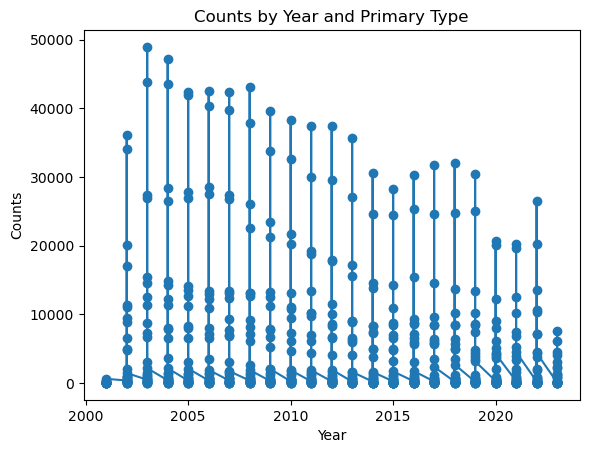

In [29]:
# Line plot of the counts by year and primary type
grouped = repeat_offenders.groupby(['Year', 'Primary Type'])

counts = grouped['counts'].sum()

counts = counts.reset_index()

plt.plot(counts['Year'], counts['counts'], marker='o')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts by Year and Primary Type')
plt.show()

In [30]:
top_offenders = df[df['Primary Type'].isin(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]
top_offenders = top_offenders.groupby(['Primary Type', 'Description', 'Arrest', 'Domestic', 'Year', 'Location']).size()
top_offenders = top_offenders.reset_index(name='counts')
top_offenders.sort_values(by='counts', ascending=False, inplace=True)
top_offenders.head(10)

,Primary Type,Description,Arrest,Domestic,Year,Location,counts
2053880,THEFT,RETAIL THEFT,True,False,2003,"(41.754592961, -87.741528537)",177
2062509,THEFT,RETAIL THEFT,True,False,2015,"(41.883500187, -87.627876698)",171
2054159,THEFT,RETAIL THEFT,True,False,2003,"(41.883500187, -87.627876698)",165
2058777,THEFT,RETAIL THEFT,True,False,2009,"(41.909664252, -87.742728815)",164
2059984,THEFT,RETAIL THEFT,True,False,2011,"(41.883500187, -87.627876698)",160
2063659,THEFT,RETAIL THEFT,True,False,2017,"(41.883500187, -87.627876698)",157
1182753,NARCOTICS,ATTEMPT POSSESSION NARCOTICS,True,False,2003,"(41.876889551, -87.690074383)",155
2063080,THEFT,RETAIL THEFT,True,False,2016,"(41.883500187, -87.627876698)",152
2064726,THEFT,RETAIL THEFT,True,False,2019,"(41.883500187, -87.627876698)",150
2061939,THEFT,RETAIL THEFT,True,False,2014,"(41.883500187, -87.627876698)",150


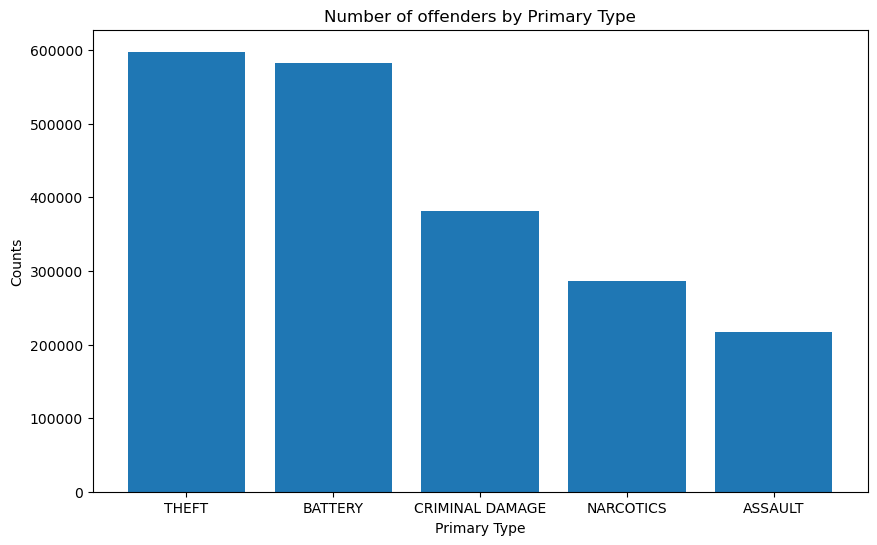

In [31]:
plt.figure(figsize=(10,6))
plt.bar(top_offenders['Primary Type'].value_counts().index, top_offenders['Primary Type'].value_counts())
plt.xlabel("Primary Type")
plt.ylabel('Counts')
plt.title("Number of offenders by Primary Type")
plt.show()

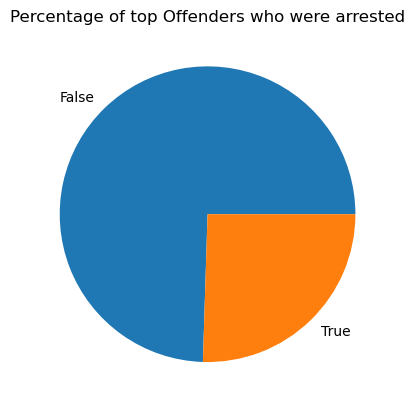

In [32]:
# pie chart ot the percentage of top offenders who were arrested
percen_arrested = top_offenders['Arrest'].value_counts()/len(top_offenders)
plt.pie(percen_arrested, labels=percen_arrested.index)
plt.title('Percentage of top Offenders who were arrested')
plt.show()

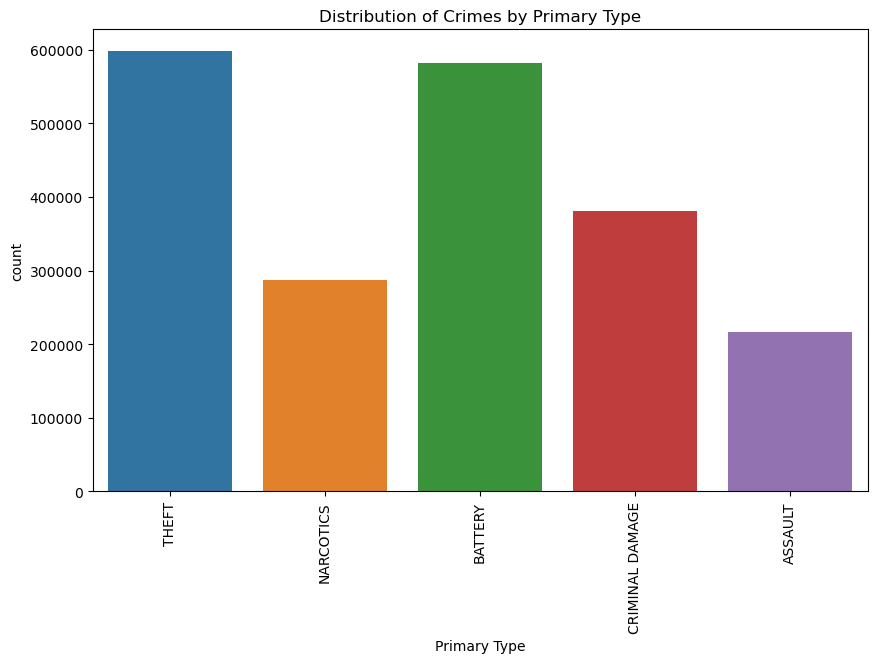

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=top_offenders, x='Primary Type')
plt.xticks(rotation=90)
plt.title('Distribution of Crimes by Primary Type')
plt.show()

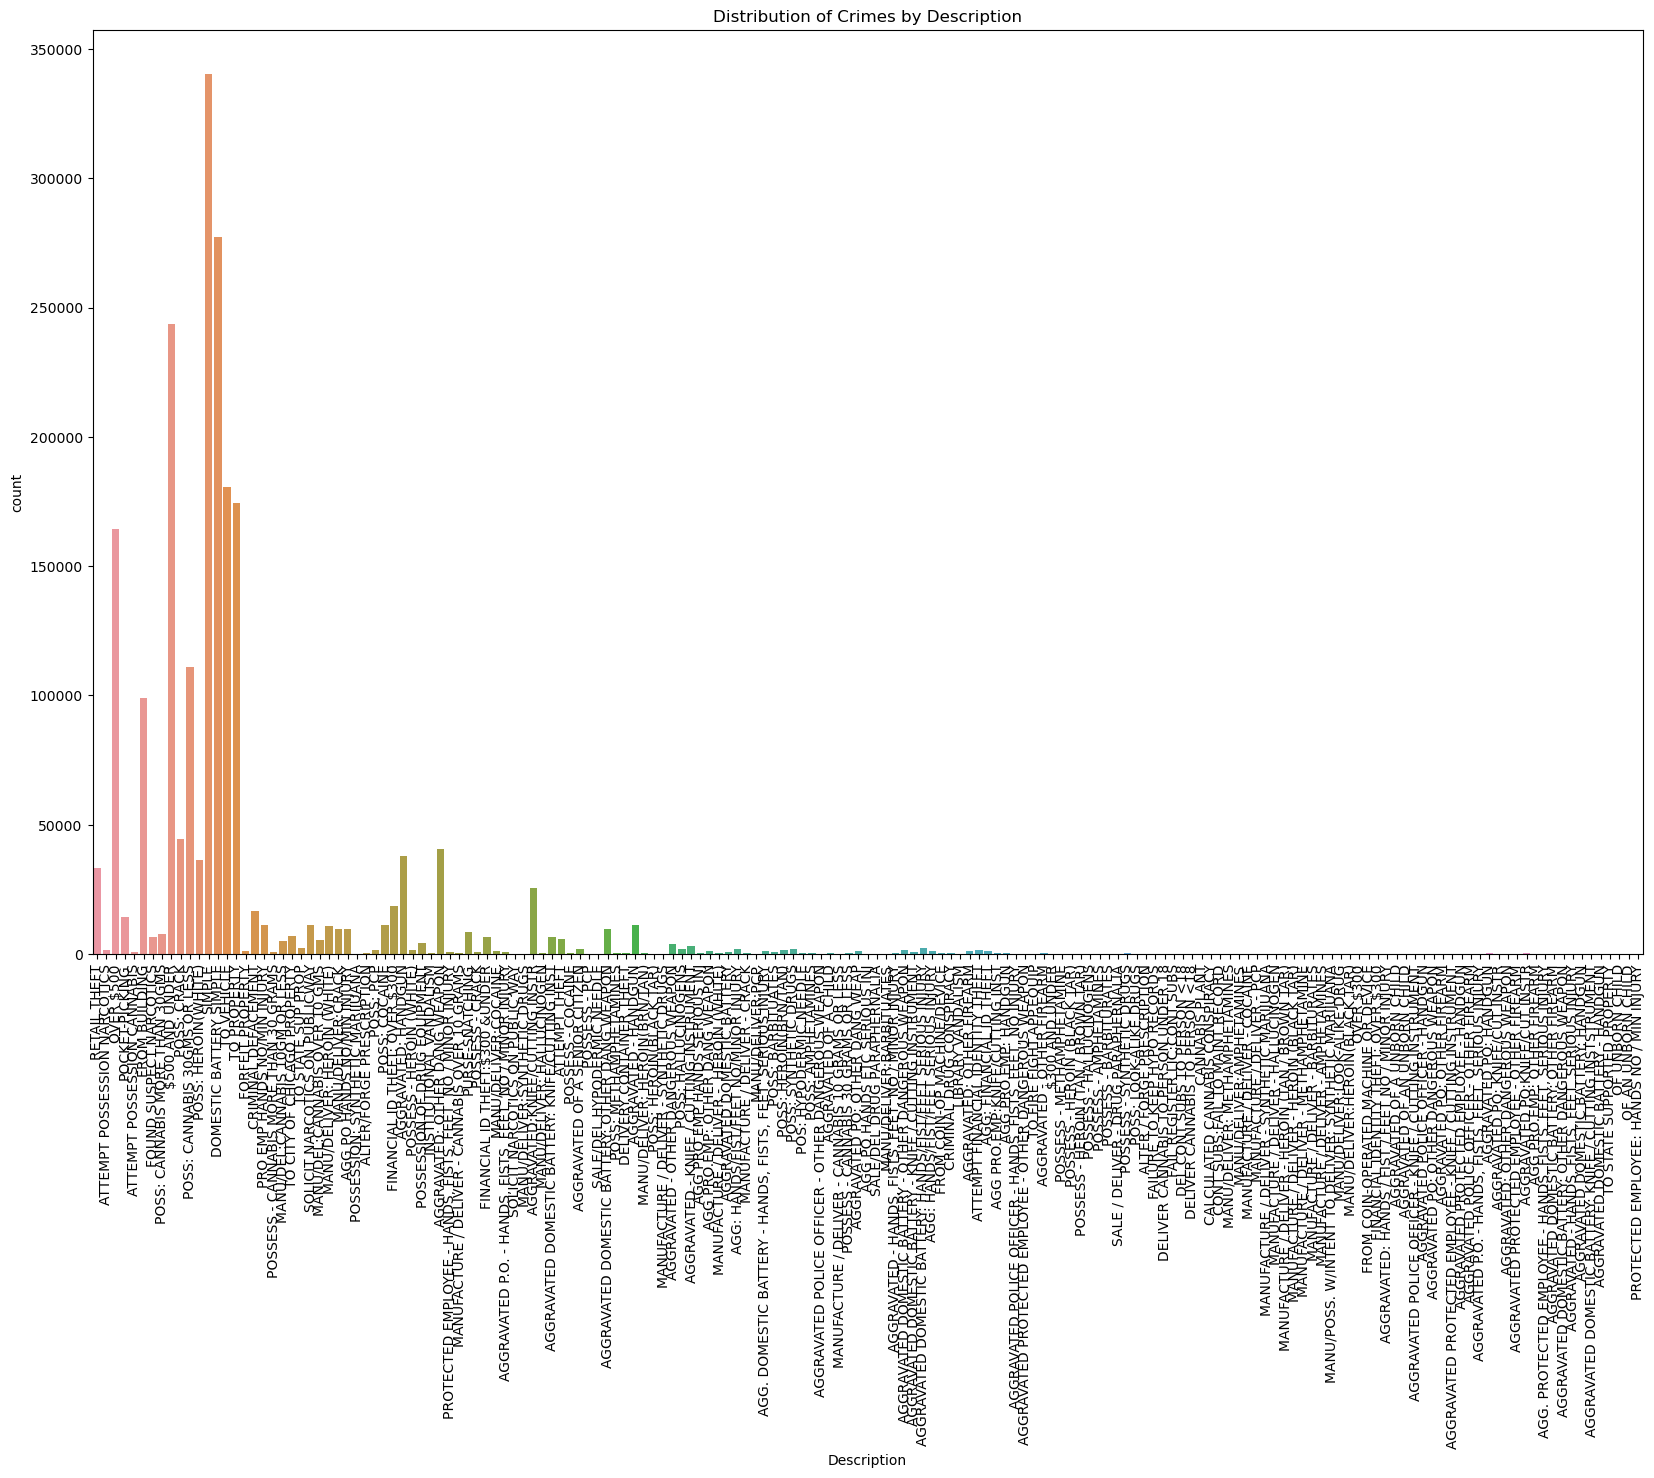

In [34]:
plt.figure(figsize=(20, 12))
sns.countplot(data=top_offenders, x='Description')
plt.xticks(rotation=90)
plt.title('Distribution of Crimes by Description')
plt.show()

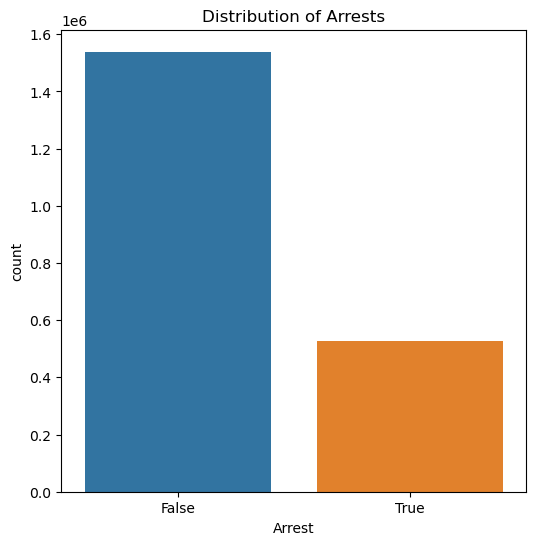

In [35]:
plt.figure(figsize=(6, 6))
sns.countplot(data=top_offenders, x='Arrest')
plt.title('Distribution of Arrests')
plt.show()

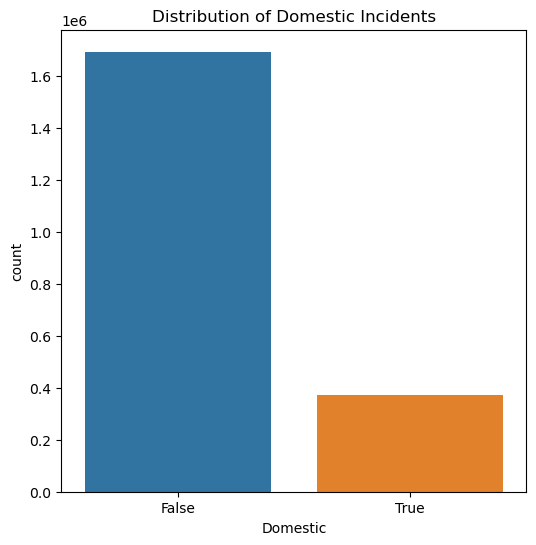

In [36]:
plt.figure(figsize=(6, 6))
sns.countplot(data=top_offenders, x='Domestic')
plt.title('Distribution of Domestic Incidents')
plt.show()

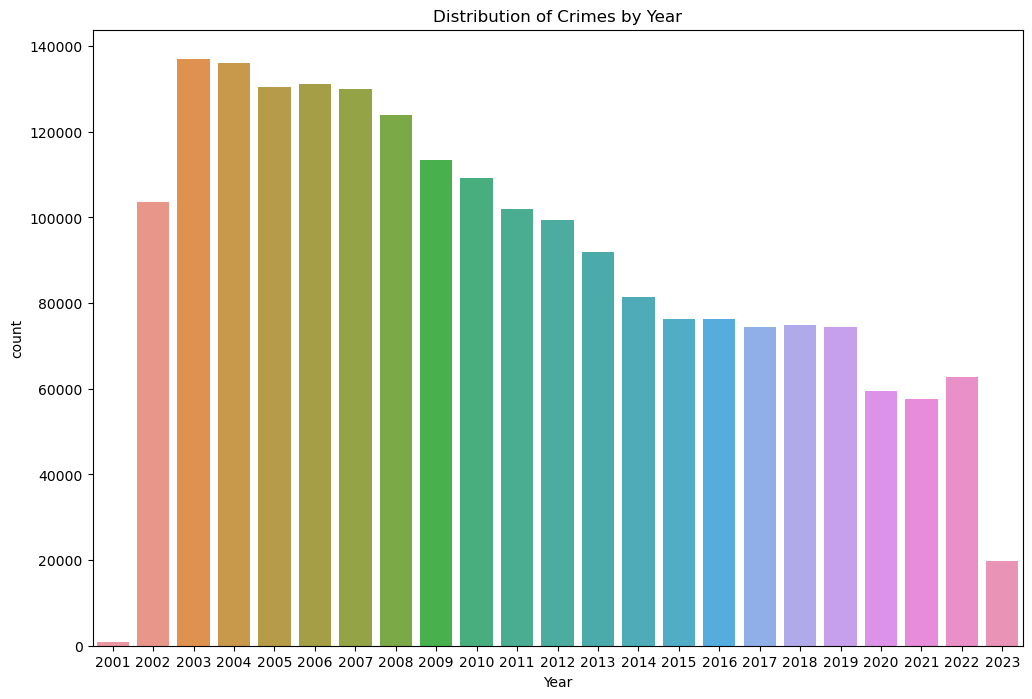

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(data=top_offenders, x='Year')
plt.title('Distribution of Crimes by Year')
plt.show()

In [38]:
# Analyze the relationship between crime and arrest
crime_arrested = df.groupby(['Primary Type', 'Arrest', 'Location']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

In [39]:
print(crime_arrested)

               Primary Type  Arrest                       Location  counts
1761401               THEFT    True  (41.883500187, -87.627876698)    2641
1731541               THEFT   False  (41.976290414, -87.905227221)    2361
1752811               THEFT    True  (41.754592961, -87.741528537)    1885
1548822               THEFT   False  (41.754592961, -87.741528537)    1745
1331790       OTHER OFFENSE   False  (41.976290414, -87.905227221)    1282
1151461           NARCOTICS    True  (41.868180939, -87.709271389)    1176
1764314               THEFT    True  (41.909664252, -87.742728815)    1086
1763093               THEFT    True  (41.897895128, -87.624096605)     974
912027   DECEPTIVE PRACTICE    True  (41.885487535, -87.726422045)     911
1654392               THEFT   False  (41.897895128, -87.624096605)     886


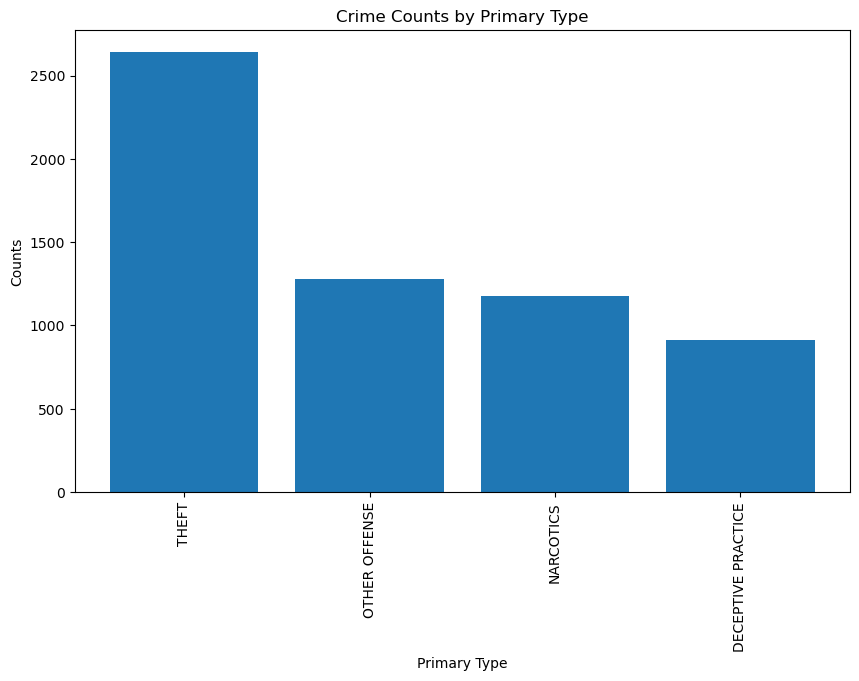

In [40]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(crime_arrested['Primary Type'], crime_arrested['counts'])
plt.xlabel('Primary Type')
plt.ylabel('Counts')
plt.title('Crime Counts by Primary Type')
plt.xticks(rotation=90)
plt.show()

Hotspot Analysis

In [41]:
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,HV146176,02/04/2012 09:00:00 PM,038XX W 80TH ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,STREET,False,False,834,...,18.0,70.0,14,1152266.0,1851268.0,2012,02/10/2018 03:50:01 PM,41.747738,-87.717629,"(41.747738327, -87.717629054)"
1,HL795312,12/17/2005 06:25:00 PM,088XX S DORCHESTER AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,412,...,8.0,48.0,14,1186996.0,1846683.0,2005,02/28/2018 03:56:25 PM,41.734404,-87.590513,"(41.734404191, -87.590513422)"
2,HR439386,06/27/2009 02:00:00 AM,050XX N KENMORE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,TAXICAB,False,False,2024,...,46.0,3.0,11,1168334.0,1933984.0,2009,02/28/2018 03:56:25 PM,41.974387,-87.656361,"(41.974387363, -87.656360778)"
3,HM446705,06/26/2006 08:00:00 PM,004XX E 91ST ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,633,...,6.0,44.0,14,1180843.0,1844741.0,2006,02/28/2018 03:56:25 PM,41.729219,-87.613115,"(41.729218626, -87.613114546)"
4,JF374310,08/29/2022 04:20:00 AM,052XX N MASON AVE,0810,THEFT,OVER $500,STREET,False,False,1622,...,45.0,11.0,06,1135537.0,1934461.0,2022,01/03/2023 03:46:28 PM,41.976344,-87.776955,"(41.976344142, -87.776954912)"


In [42]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_13294/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [43]:
# Extract year, month, day, hour, and minute
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute

In [44]:
grouped = df.groupby(['Location', 'Year', 'Month', 'Day', 'Hour', 'Minute']).size().reset_index(name='counts')

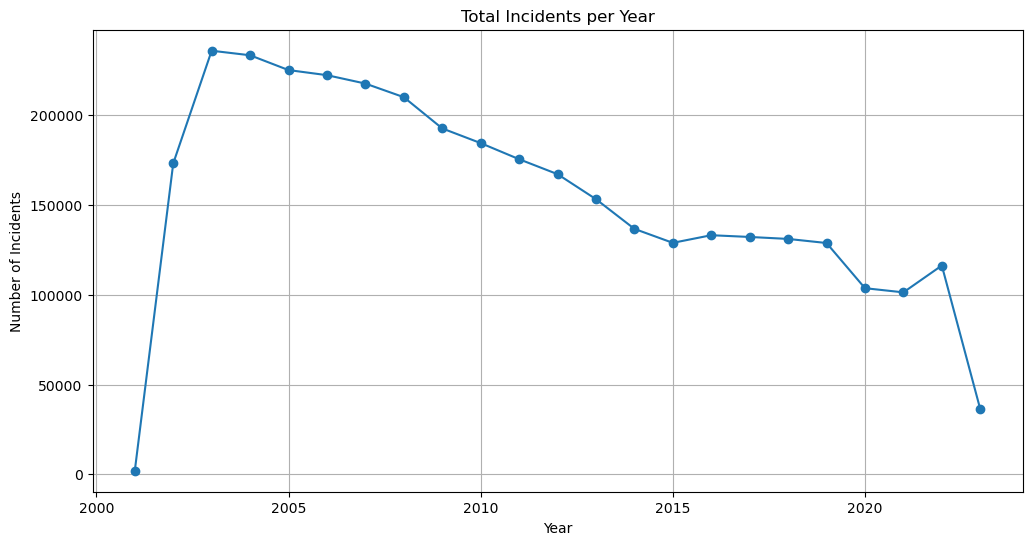

In [45]:
yearly_counts = grouped.groupby('Year')['counts'].sum()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Total Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

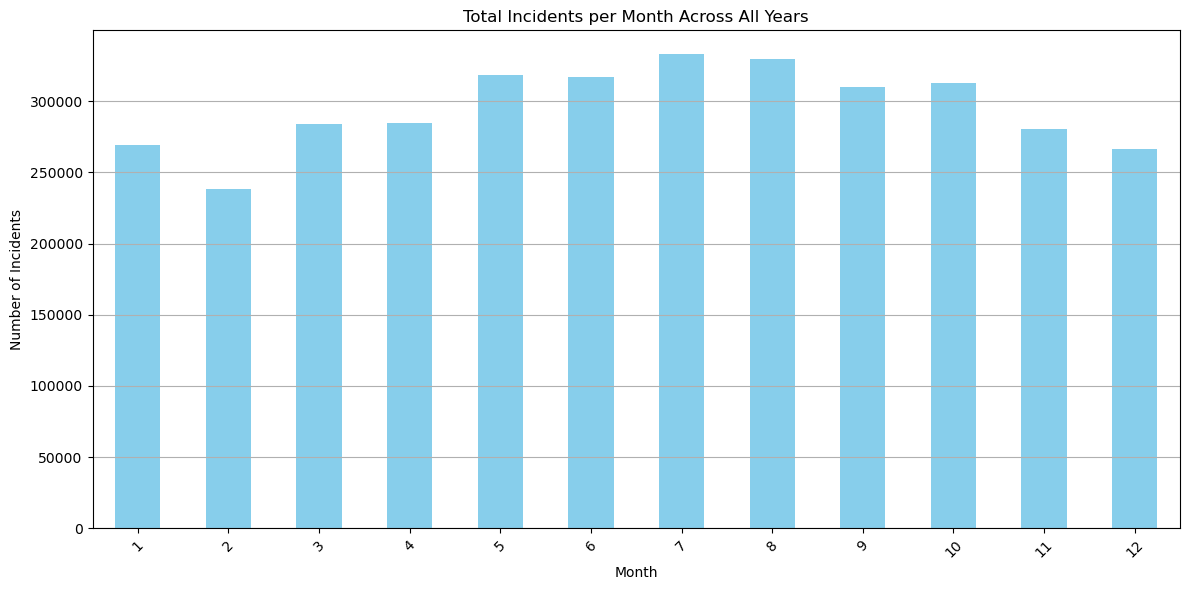

In [46]:
# Group by Month and sum up the counts for each month across all years
monthly_counts = grouped.groupby('Month')['counts'].sum()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Total Incidents per Month Across All Years')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

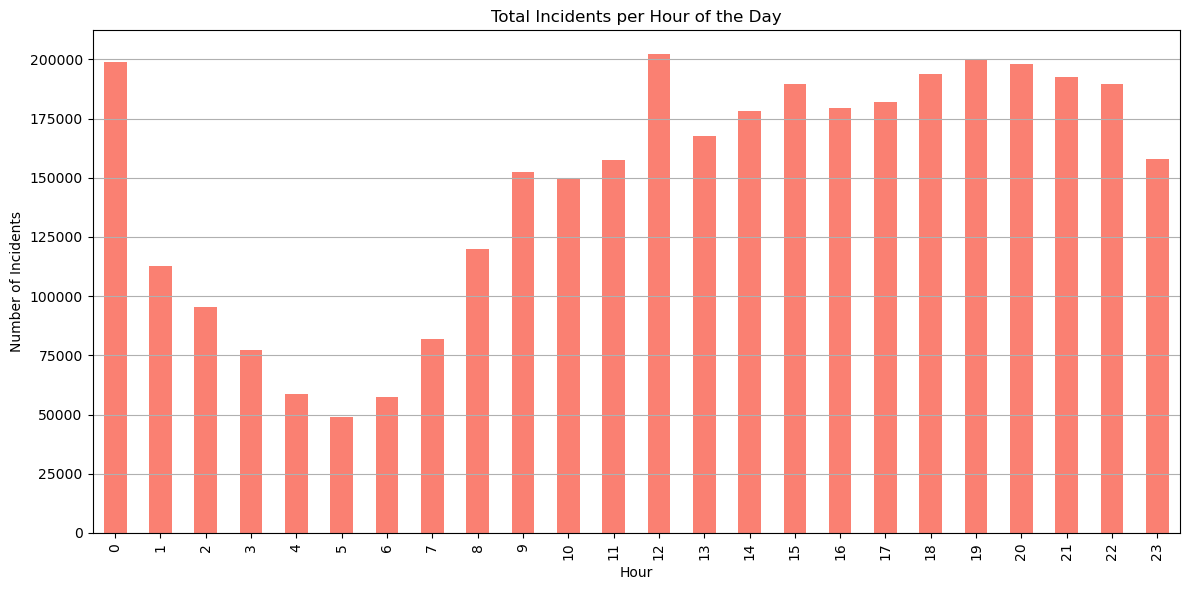

In [47]:
hourly_counts = grouped.groupby('Hour')['counts'].sum()

plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='salmon')
plt.title('Total Incidents per Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

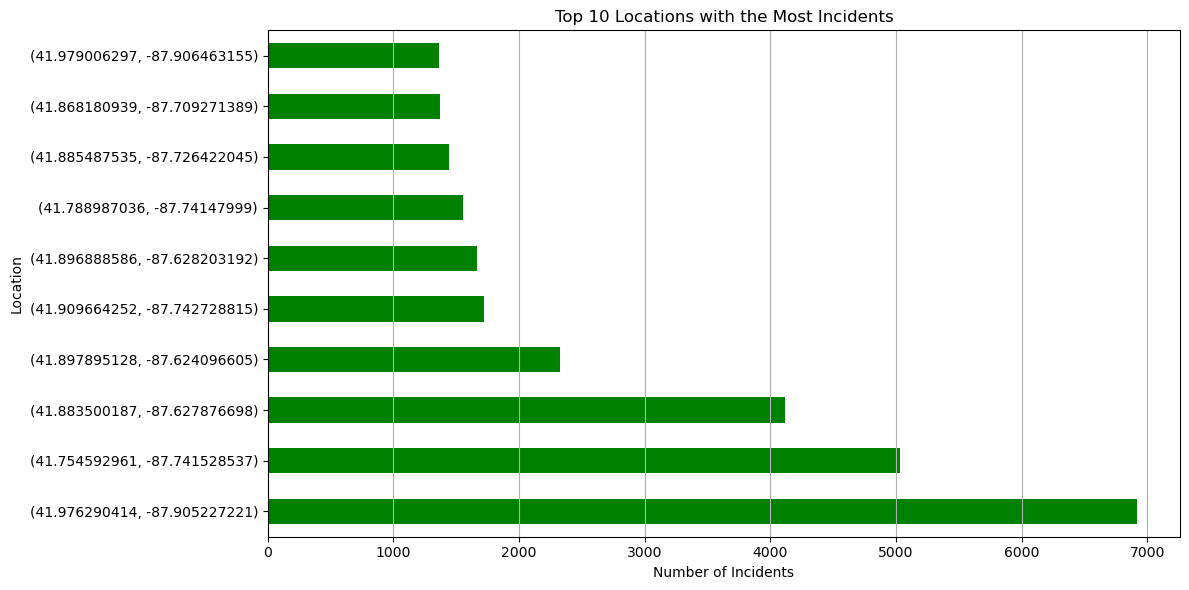

In [48]:
top_locations = grouped.groupby('Location')['counts'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_locations.plot(kind='barh', color='green')
plt.title('Top 10 Locations with the Most Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Location')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

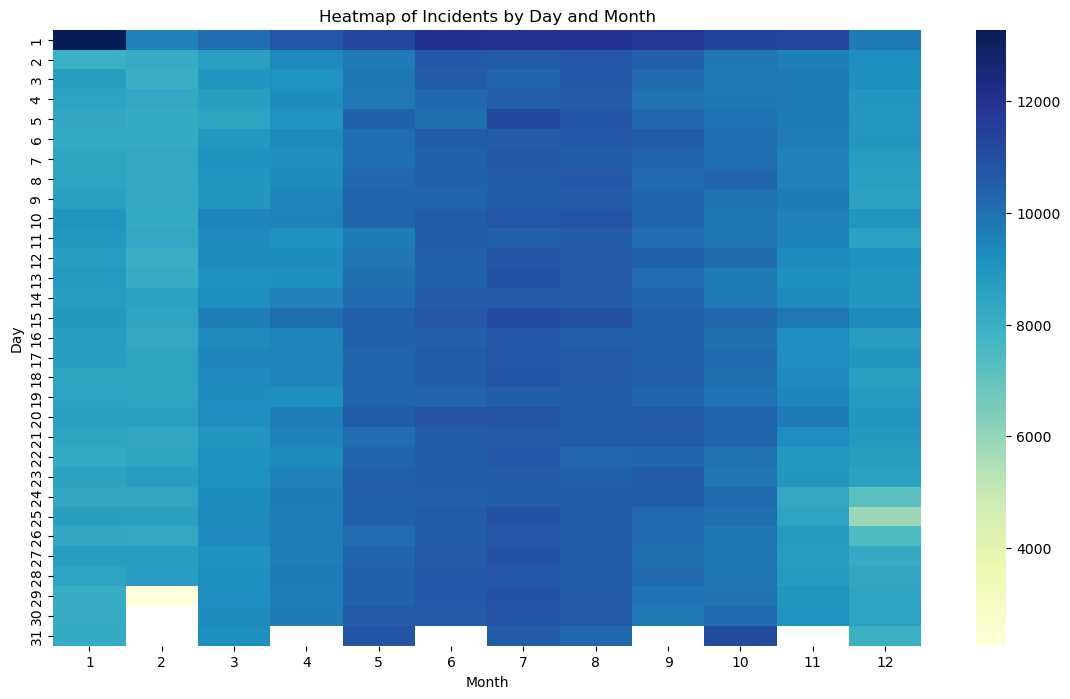

In [49]:
# Pivot table for heatmap
heatmap_data = grouped.pivot_table(values='counts', index='Day', columns='Month', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Incidents by Day and Month')
plt.show()

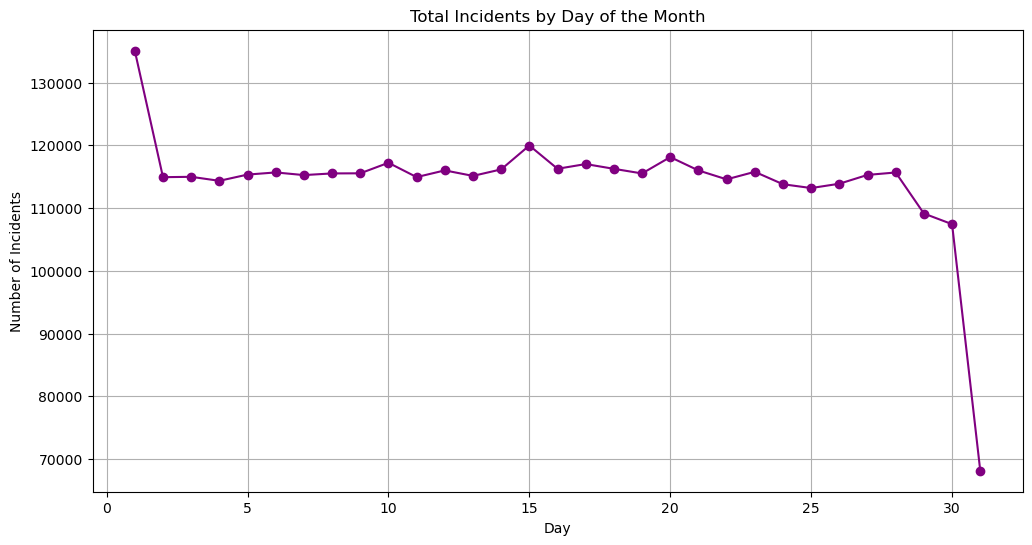

In [50]:
day_counts = grouped.groupby('Day')['counts'].sum()

plt.figure(figsize=(12, 6))
day_counts.plot(kind='line', marker='o', color='purple')
plt.title('Total Incidents by Day of the Month')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [51]:
df['DayOfWeek'] = df['Date'].dt.day_name()

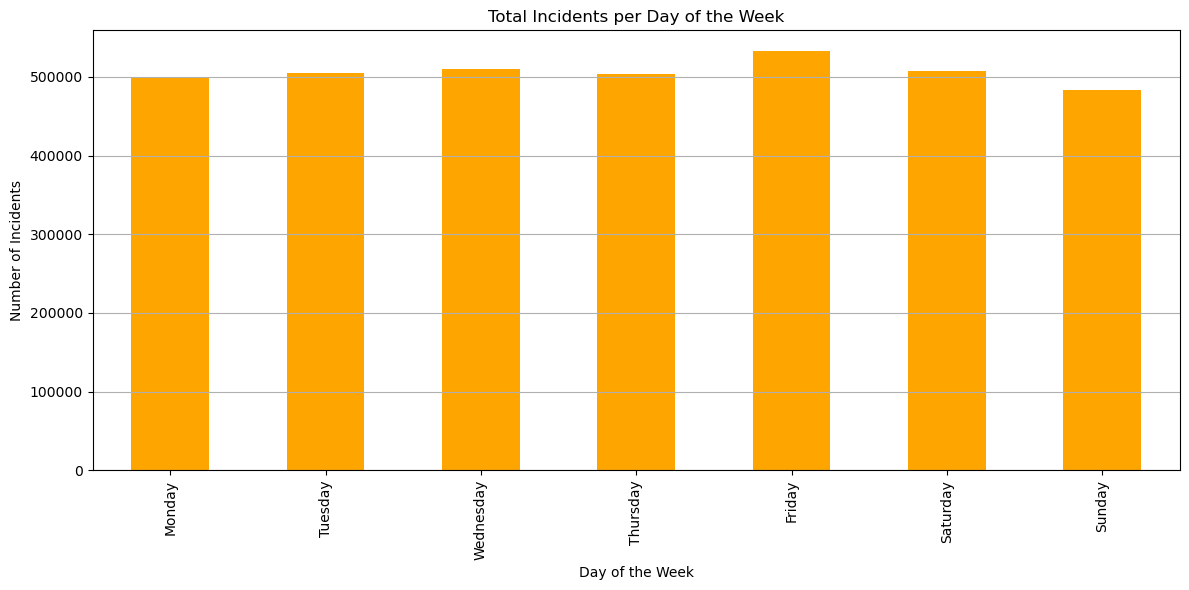

In [52]:
dayofweek_counts = df.groupby('DayOfWeek').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
dayofweek_counts.plot(kind='bar', color='orange')
plt.title('Total Incidents per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

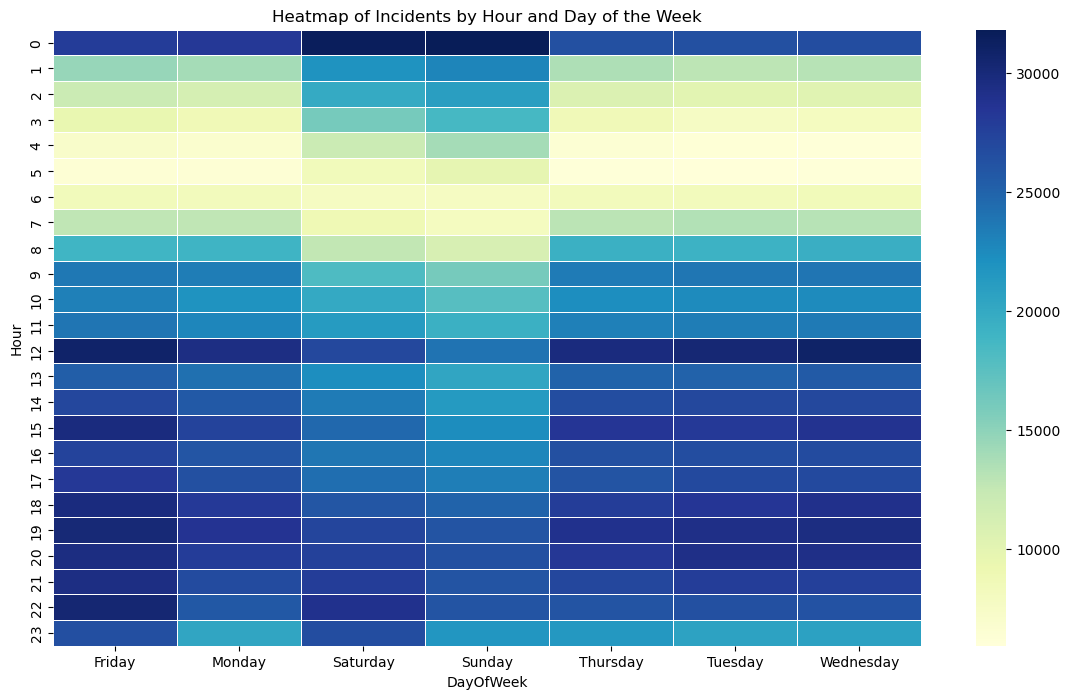

In [53]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Hour', columns='DayOfWeek', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Incidents by Hour and Day of the Week')
plt.show()

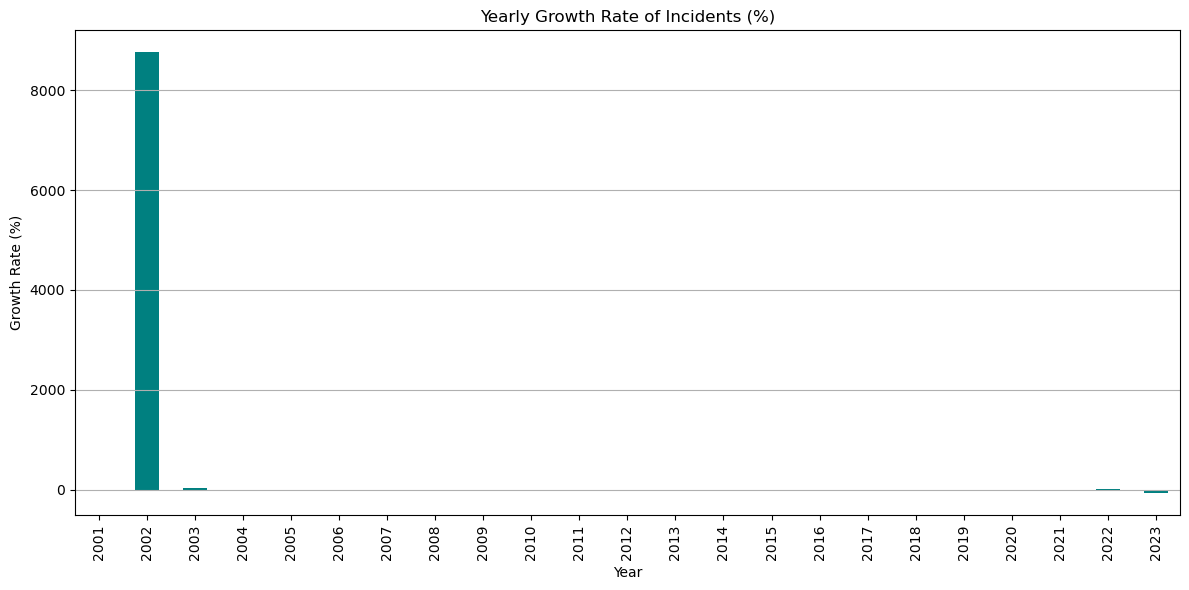

In [54]:
yearly_counts = df.groupby('Year').size()

# Calculate yearly growth rate
yearly_growth_rate = yearly_counts.pct_change() * 100

plt.figure(figsize=(12, 6))
yearly_growth_rate.plot(kind='bar', color='teal')
plt.title('Yearly Growth Rate of Incidents (%)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

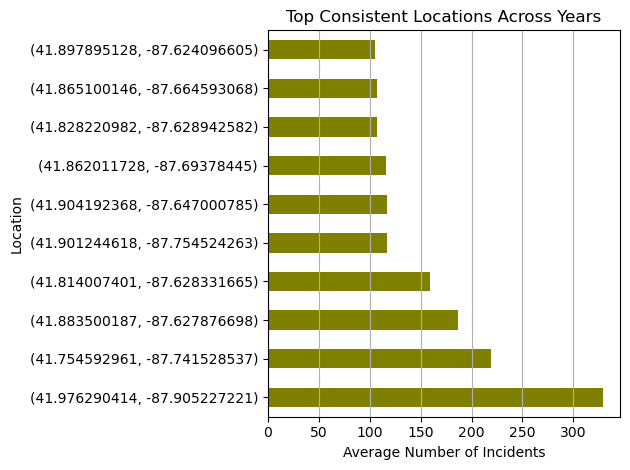

In [55]:
# Group by location and year
locations_yearly = df.groupby(['Location', 'Year']).size().reset_index(name='counts')

# Top locations consistently over the years
top_locations_consistent = locations_yearly.groupby('Location')['counts'].mean().nlargest(10)

top_locations_consistent.plot(kind='barh', color='olive')
plt.title('Top Consistent Locations Across Years')
plt.xlabel('Average Number of Incidents')
plt.ylabel('Location')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

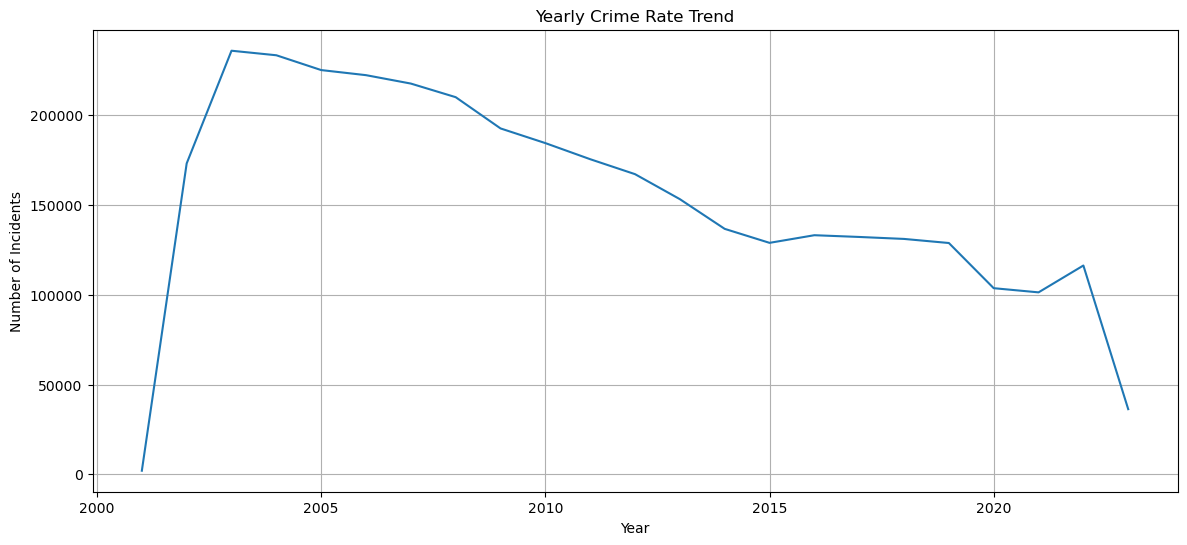

In [56]:
# Yearly trend
yearly_counts = df.groupby(df['Date'].dt.year).size()

plt.figure(figsize=(14, 6))
yearly_counts.plot()
plt.title('Yearly Crime Rate Trend')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

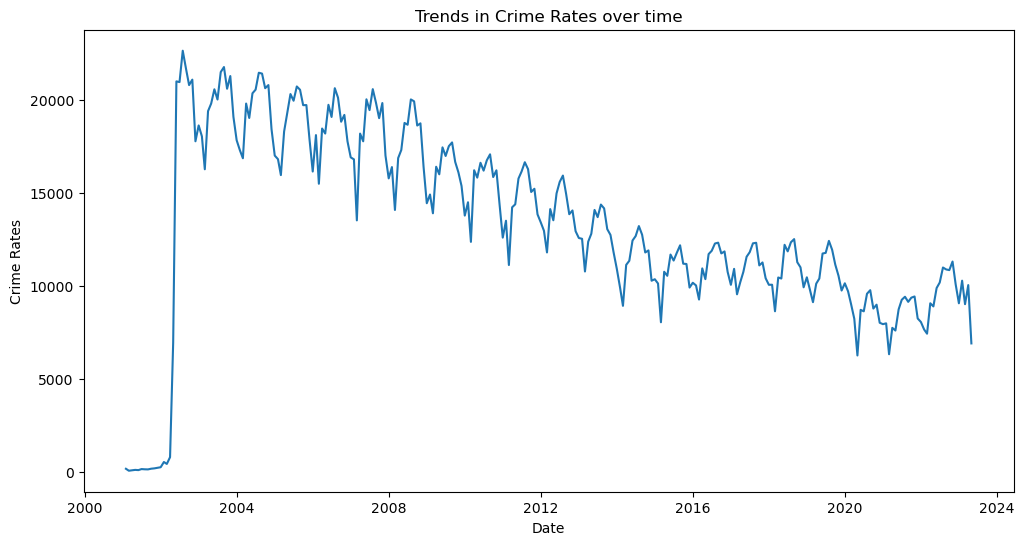

In [57]:
# Step 1: Analyze trends in crime rates over time
crime_rates_by_time =  df.groupby(pd.Grouper(key='Date', freq='M')).size()
plt.figure(figsize=(12,6))
sns.lineplot(data=crime_rates_by_time)
plt.xlabel('Date')
plt.ylabel("Crime Rates")
plt.title("Trends in Crime Rates over time")
plt.show()

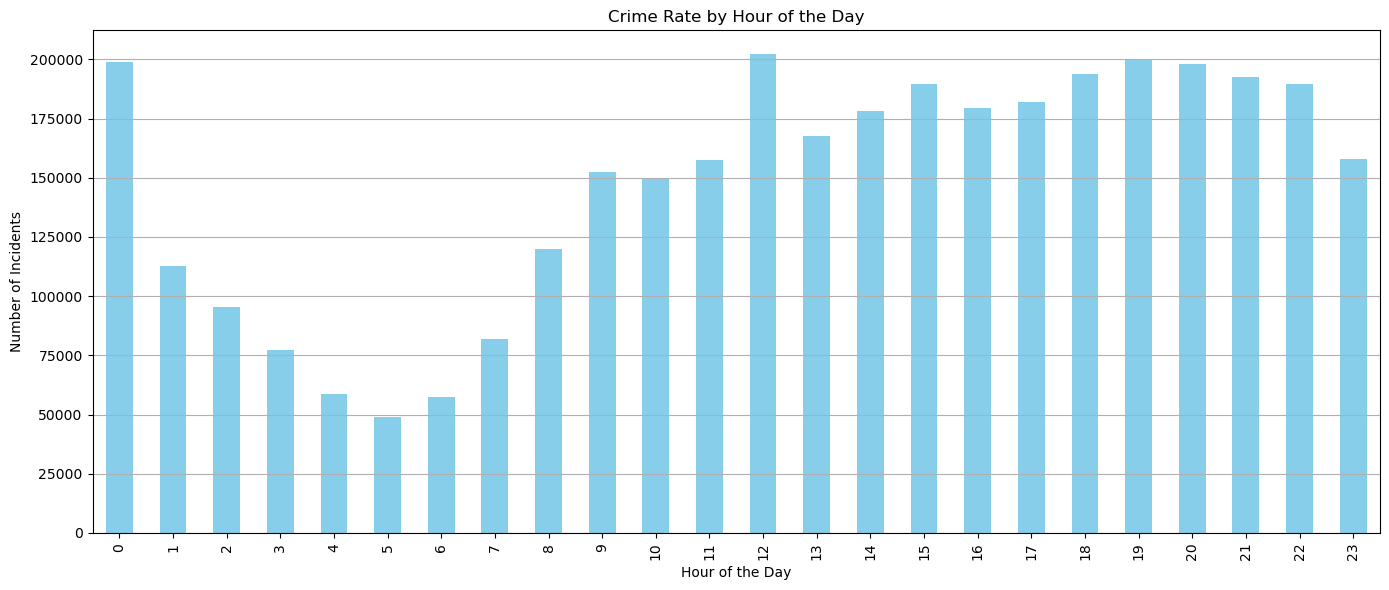

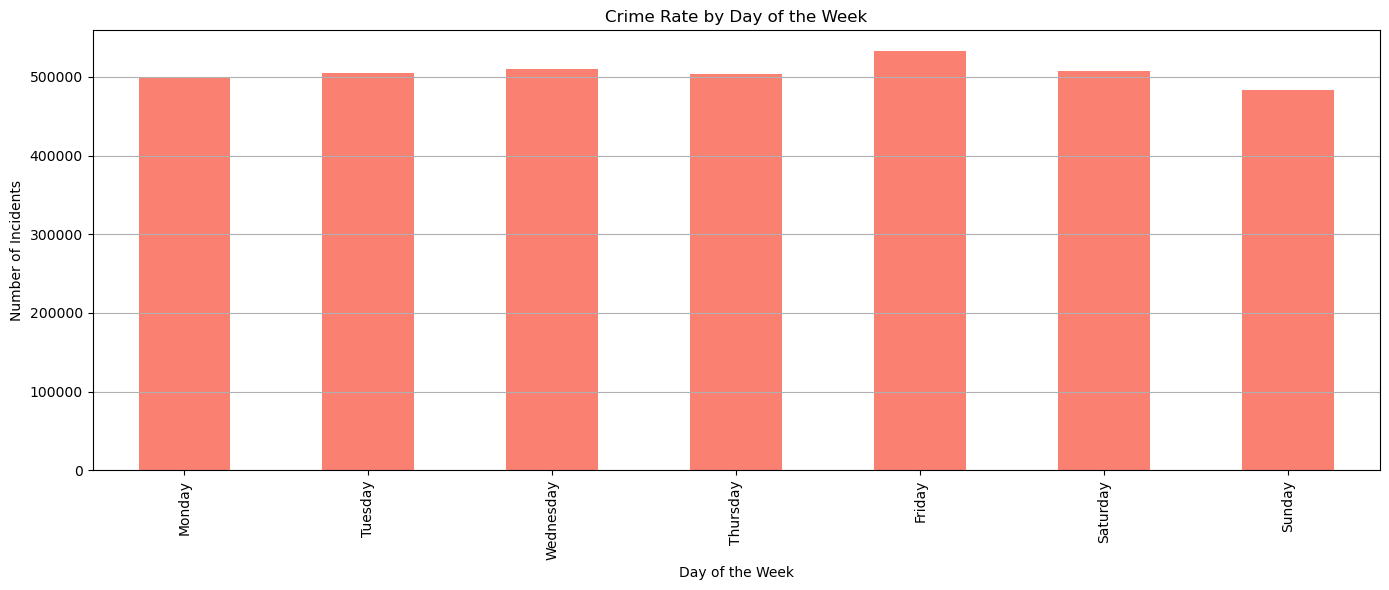

In [58]:
# Hourly trend
hourly_counts = df.groupby(df['Date'].dt.hour).size()

plt.figure(figsize=(14, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# By day of the week
dayofweek_counts = df.groupby(df['Date'].dt.day_name()).size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 6))
dayofweek_counts.plot(kind='bar', color='salmon')
plt.title('Crime Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

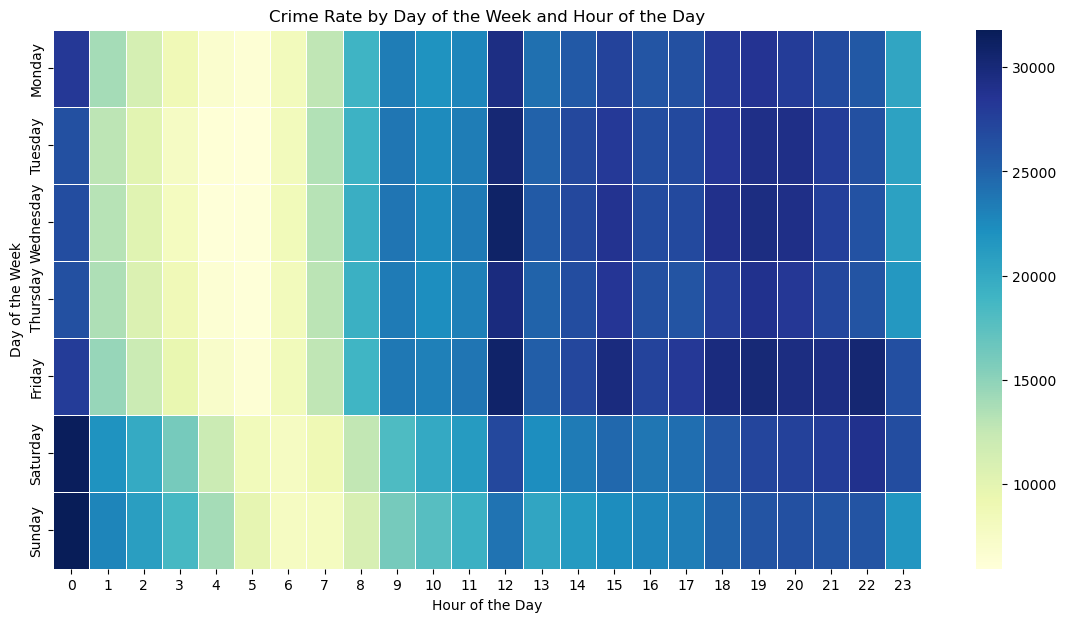

In [59]:
# Group the data by day of the week and hour from the main dataframe
crime_counts_weekly_and_hour = df.groupby([df['Date'].dt.dayofweek, df['Date'].dt.hour]).size().unstack()

# Renaming the days of the week for clarity
crime_counts_weekly_and_hour.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting a heatmap for visualization
plt.figure(figsize=(14, 7))
sns.heatmap(crime_counts_weekly_and_hour, cmap="YlGnBu", linewidths=.5)
plt.title('Crime Rate by Day of the Week and Hour of the Day')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of the Day')
plt.show()

crime-type segmentation

1. what are the different types of crime that occur in the area?
2. Are there any specific types of crime that are more common than others?
3. Are there any trends in the types of crime that occur over time?


In [60]:
unique_crimes = df['Primary Type'].unique()
print(unique_crimes)

['CRIMINAL DAMAGE' 'DECEPTIVE PRACTICE' 'THEFT' 'BURGLARY'
 'MOTOR VEHICLE THEFT' 'BATTERY' 'NARCOTICS' 'CRIMINAL TRESPASS' 'ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'OTHER OFFENSE' 'ROBBERY'
 'INTERFERENCE WITH PUBLIC OFFICER' 'WEAPONS VIOLATION'
 'PUBLIC PEACE VIOLATION' 'HOMICIDE' 'PROSTITUTION' 'CRIM SEXUAL ASSAULT'
 'GAMBLING' 'CRIMINAL SEXUAL ASSAULT' 'SEX OFFENSE' 'KIDNAPPING'
 'LIQUOR LAW VIOLATION' 'OBSCENITY' 'CONCEALED CARRY LICENSE VIOLATION'
 'ARSON' 'INTIMIDATION' 'STALKING' 'OTHER NARCOTIC VIOLATION'
 'PUBLIC INDECENCY' 'NON-CRIMINAL' 'HUMAN TRAFFICKING' 'RITUALISM'
 'NON - CRIMINAL' 'NON-CRIMINAL (SUBJECT SPECIFIED)']


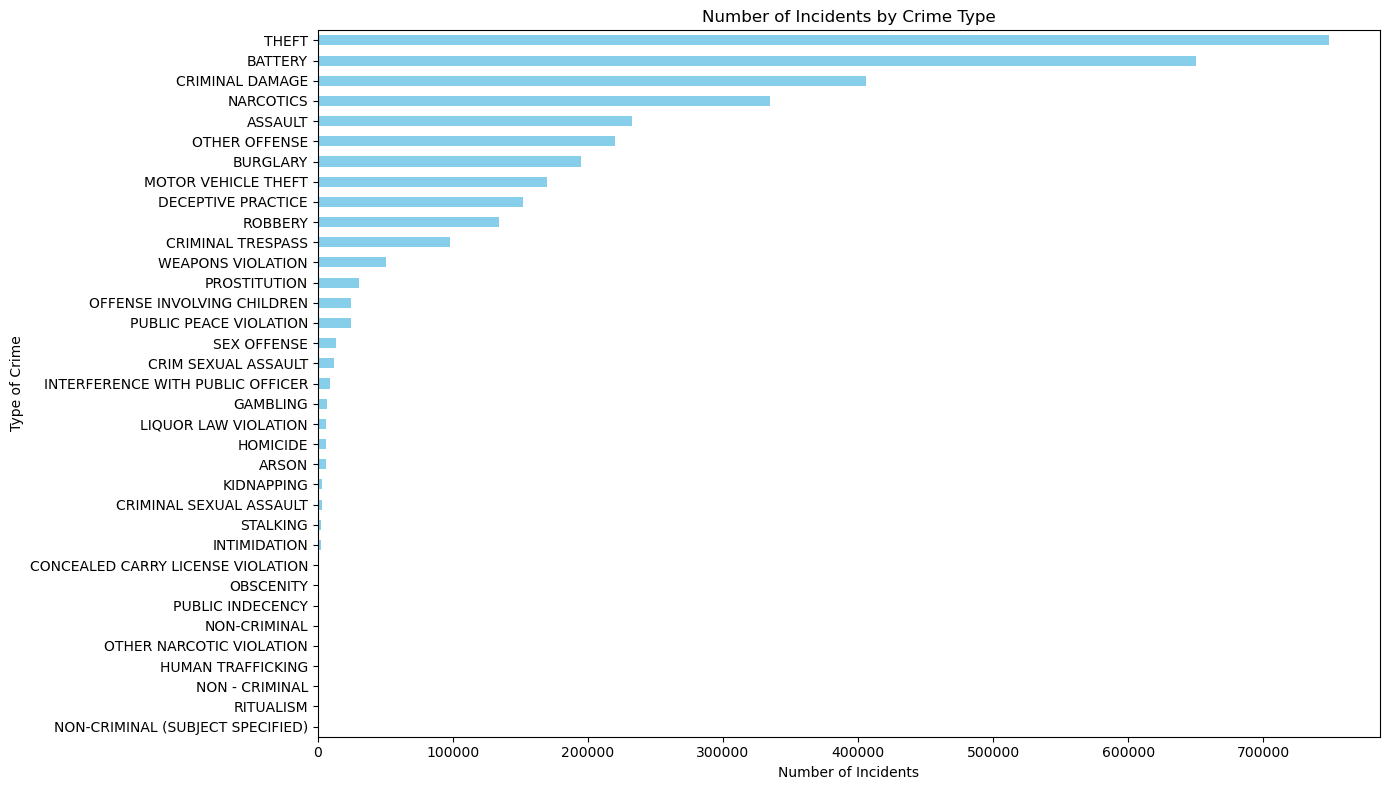

In [61]:
crime_counts = df['Primary Type'].value_counts()

plt.figure(figsize=(14, 8))
crime_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Incidents by Crime Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Type of Crime')
plt.tight_layout()
plt.gca().invert_yaxis()  # To display the most frequent crimes on top
plt.show()

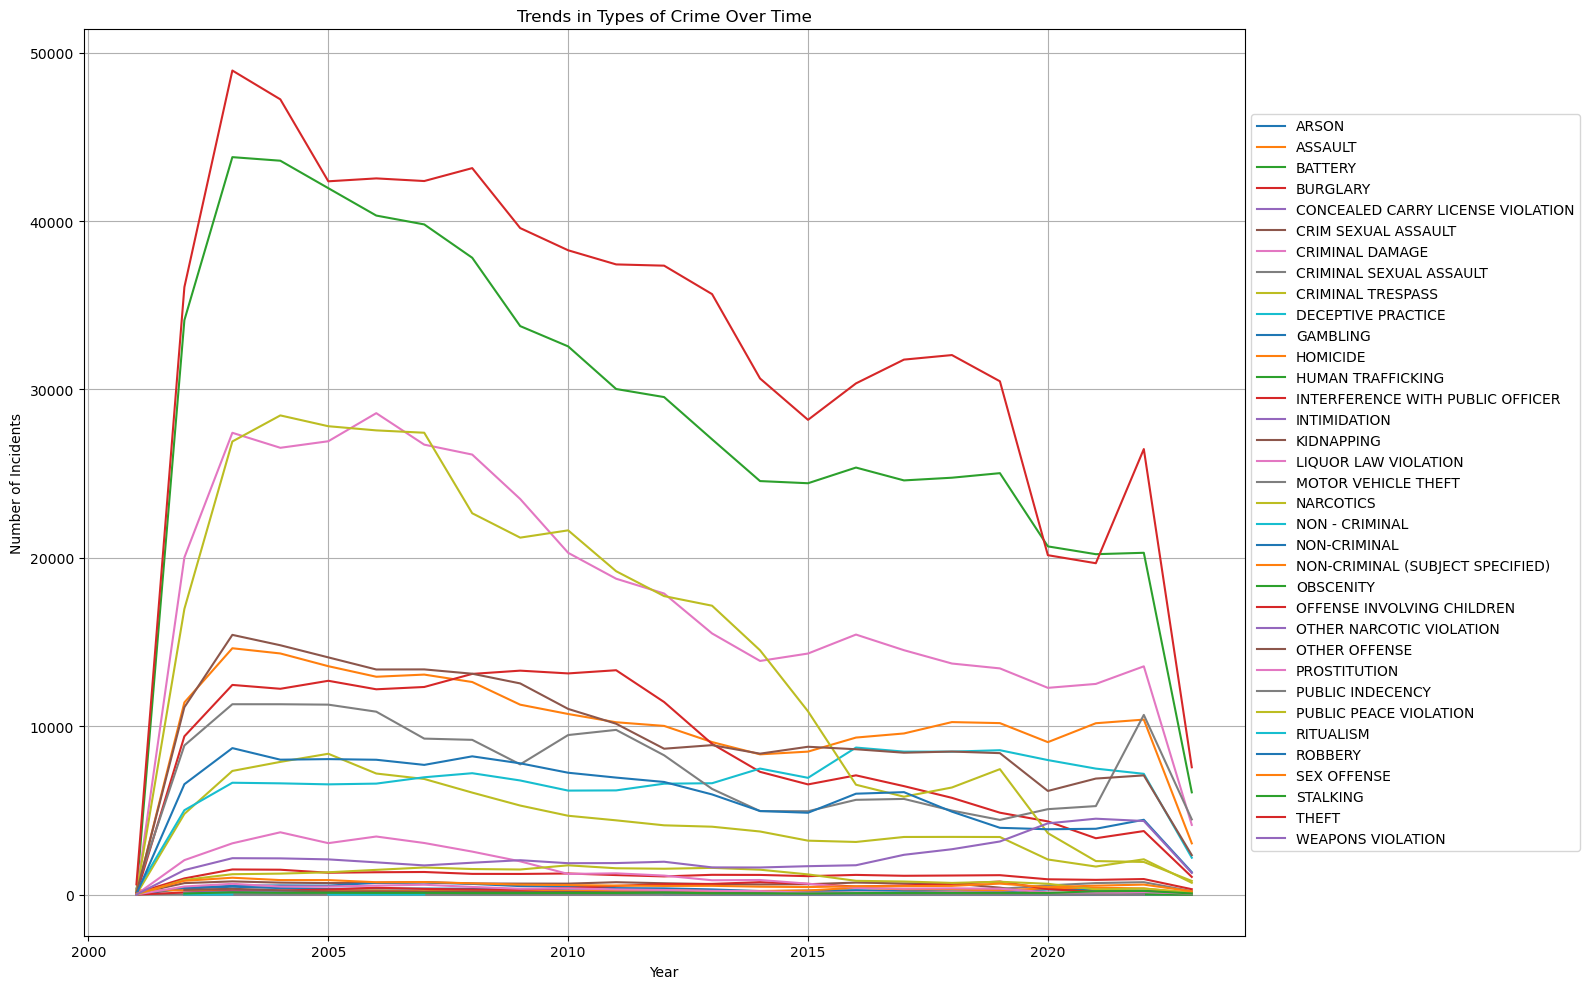

In [62]:
# Group by year and crime type
crime_trends = df.groupby([df['Date'].dt.year, 'Primary Type']).size().unstack()

# Plotting the trends for each crime type
plt.figure(figsize=(16, 10))
for crime_type in crime_trends.columns:
    crime_trends[crime_type].plot(label=crime_type)

plt.title('Trends in Types of Crime Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Targeted segmentation

1. what are the specific groups of people who are at risk of being victims of crimes?
2. what are the specific factors that put people at risk of being victims of crime?
3. what can be done to reduce the risk of crime for these groups of people?

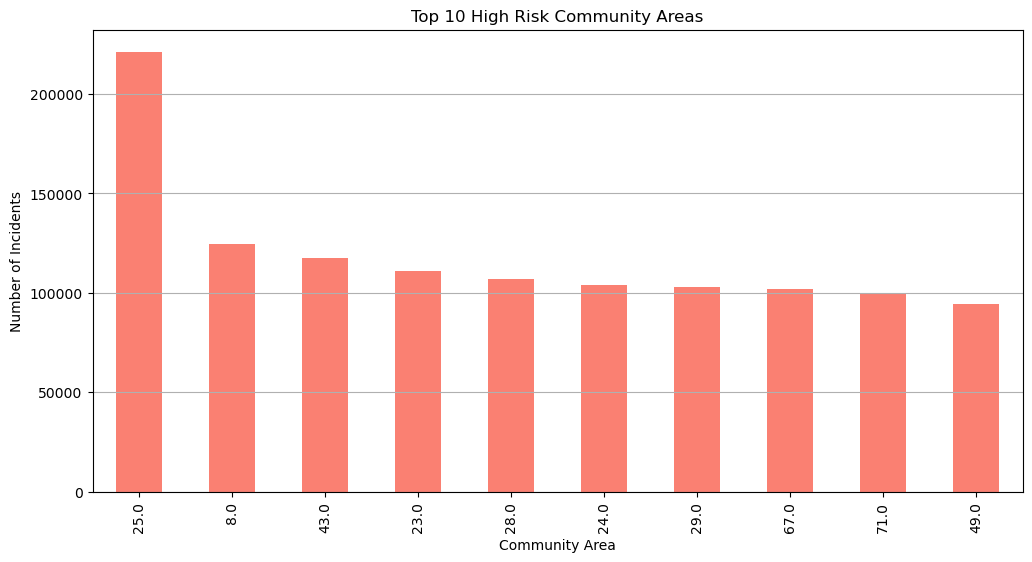

In [63]:
high_risk_areas = df['Community Area'].value_counts().head(10)

plt.figure(figsize=(12, 6))
high_risk_areas.plot(kind='bar', color='salmon')
plt.title('Top 10 High Risk Community Areas')
plt.xlabel('Community Area')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

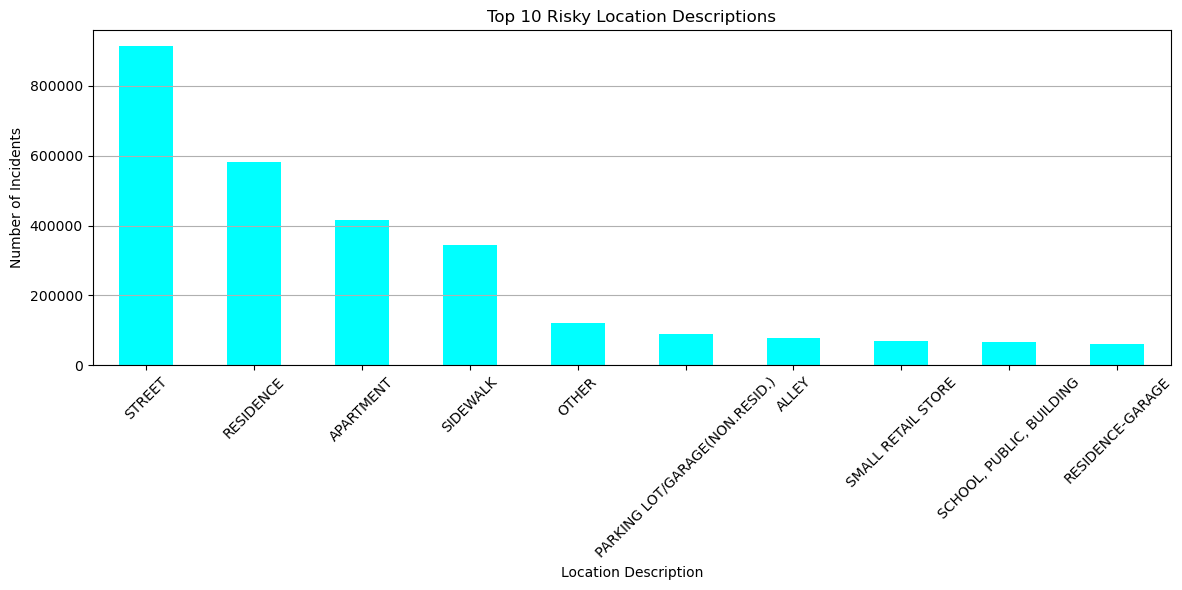

In [64]:
# Top 10 Risky Location Descriptions
high_risk_location_desc = df['Location Description'].value_counts().head(10)

plt.figure(figsize=(12, 6))
high_risk_location_desc.plot(kind='bar', color='cyan')
plt.title('Top 10 Risky Location Descriptions')
plt.xlabel('Location Description')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

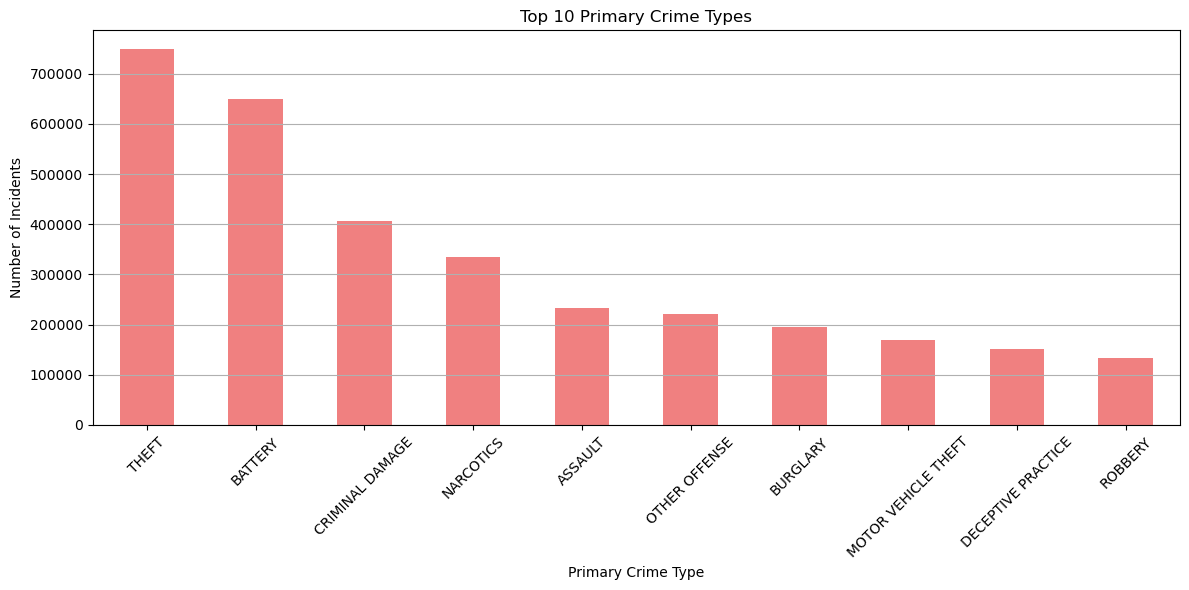

In [65]:
# Top 10 Primary Crime Types
top_crime_types = df['Primary Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_crime_types.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Primary Crime Types')
plt.xlabel('Primary Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

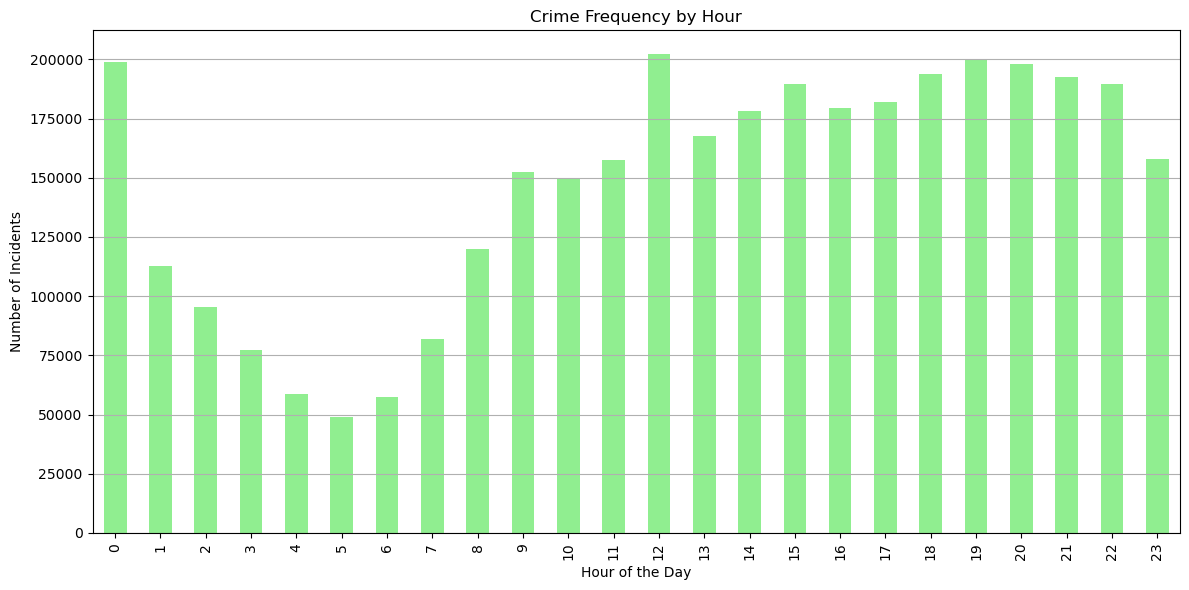

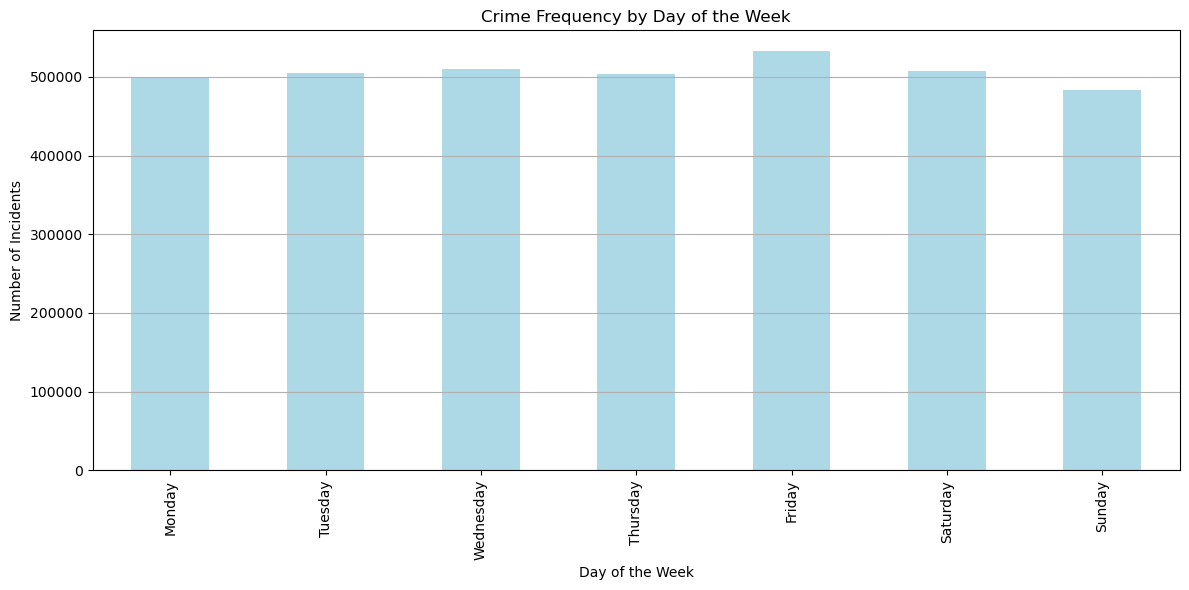

In [66]:
# Crimes by Hour
crime_by_hour = df.groupby('Hour').size()

plt.figure(figsize=(12, 6))
crime_by_hour.plot(kind='bar', color='lightgreen')
plt.title('Crime Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Crimes by Day of the Week
crime_by_day = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
crime_by_day.plot(kind='bar', color='lightblue')
plt.title('Crime Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler

# Extracting latitude and longitude data
crime_locations = df[['Latitude', 'Longitude']].dropna()

# Normalize the dataset
scaler = StandardScaler()
crime_locations_scaled = scaler.fit_transform(crime_locations)

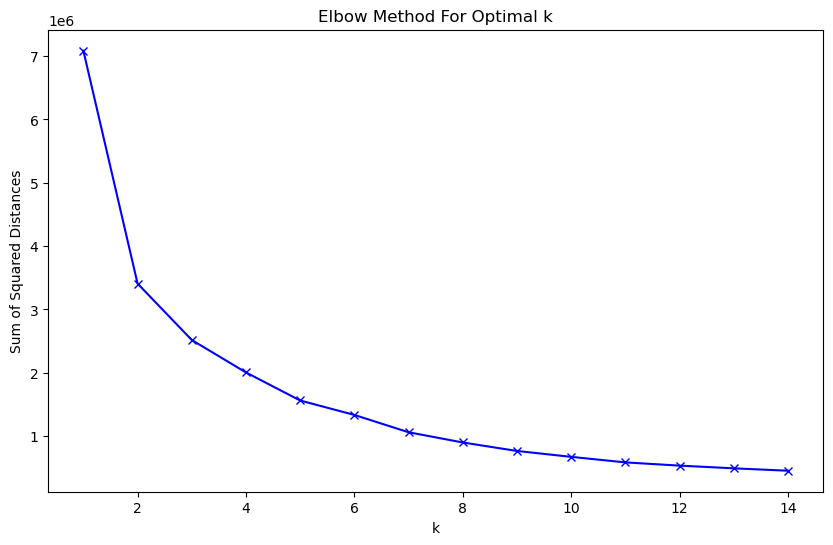

In [68]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans = kmeans.fit(crime_locations_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [69]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k)
clusters = kmeans.fit_predict(crime_locations_scaled)

# Adding cluster information to the original dataframe
crime_locations['Cluster'] = clusters

/home/mithun/miniconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


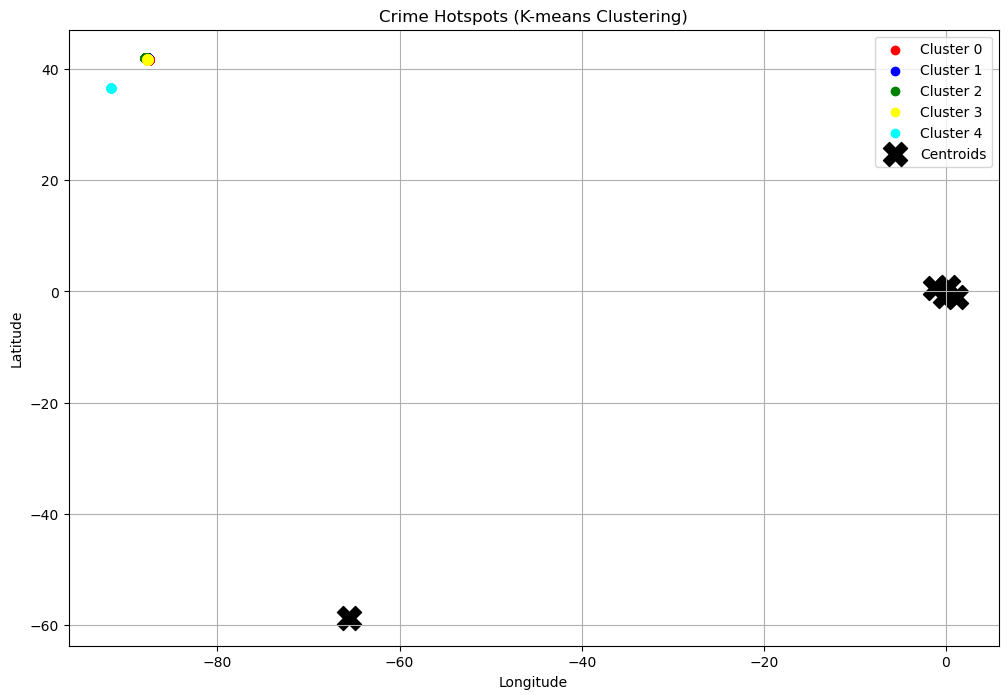

In [70]:
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'yellow', 'cyan', 'magenta']

for cluster_num in range(optimal_k):
    subset = crime_locations[crime_locations['Cluster'] == cluster_num]
    plt.scatter(subset['Longitude'], subset['Latitude'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='black', label = 'Centroids', marker='X')
plt.title('Crime Hotspots (K-means Clustering)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()